In [21]:
using HopTB, Test
include("zoo.jl")

let
    lat = [(√3) / 2 (√3) / 2 0; -1 / 2 1 / 2 0; 0 0 1]
    BN = TBModel(2, lat)
    sethopping!(BN, [0, 0, 0], 1, 1, -1 / 2)
    sethopping!(BN, [0, 0, 0], 2, 2, 1 / 2)
    sethopping!(BN, [0, 0, 0], 1, 2, -1)
    sethopping!(BN, [-1, 0, 0], 1, 2, -1)
    sethopping!(BN, [0, -1, 0], 1, 2, -1)
    setposition!(BN, [0, 0, 0], 1, 1, 1, (BN.lat * [1 / 3, 1 / 3, 0])[1])
    setposition!(BN, [0, 0, 0], 1, 1, 2, (BN.lat * [1 / 3, 1 / 3, 0])[2])
    setposition!(BN, [0, 0, 0], 1, 1, 3, (BN.lat * [1 / 3, 1 / 3, 0])[3])
    setposition!(BN, [0, 0, 0], 2, 2, 1, (BN.lat * [2 / 3, 2 / 3, 0])[1])
    setposition!(BN, [0, 0, 0], 2, 2, 2, (BN.lat * [2 / 3, 2 / 3, 0])[2])
    setposition!(BN, [0, 0, 0], 2, 2, 3, (BN.lat * [2 / 3, 2 / 3, 0])[3])

    @test HopTB.Hall._getahc(BN, 1, 2, [1 / 3 2 / 3 0; 1 / 3 2 / 3 0]')[1] ≈ -3.0 atol = 1.0e-7
    @test HopTB.Hall.getahc(BN, 1, 2, [4, 4, 1])[1] ≈ 0.0 atol = 1.0e-7
    @test HopTB.Hall.collect_berry_curvature(BN, 1, 2, [1 / 3 2 / 3 0; 1 / 3 2 / 3 0]') ≈ [-1.5 -1.5; 1.5 1.5] atol = 1.0e-7
end

let
    tm = get_Kane_Mele()
    @test HopTB.Hall.getshc(tm, 1, 2, 3, [10, 10, 1])[1, 1] ≈ -393.2616 atol=1.0e-3
end

@register "Fe.openmx" tm->begin
    ntm = HopTB.change_energy_reference(tm, -5.441778786050317507)
    σs = HopTB.Hall.getahc(ntm, 1, 2, [10, 10, 10])
    @test σs[1, 1] ≈ -794.815 atol=1.0e-3
end


LoadError: LoadError: UndefVarError: `@register` not defined
in expression starting at In[21]:29

In [29]:
using HopTB, Test, LinearAlgebra

include("zoo.jl")

let
    tm = get_Kane_Mele()
    @test HopTB.Magnetism.get_orbital_moment(tm, 3, [0.1, 0.2, 0.0])[2, 2] ≈ 0.0074738780301569566
    @test HopTB.Magnetism.get_field_modified_Es(tm, 3, 1.0, [0.1, 0.2, 0.0])[2] ≈ -2.5671018333590077
end


Test Passed

In [32]:
using HopTB, Test

let
    lat = [1 1 / 2 0; 0 sqrt(3) / 2 0; 0 0 1]
    tm = TBModel(2, lat)
    @test tm.rlat ≈ [2pi 0 0; -2pi / sqrt(3) 4pi / sqrt(3) 0; 0 0 2pi]
    @test_throws Exception sethopping!(tm, [0, 0, 0], [1, 1], 0.5im)
    sethopping!(tm, [0, 0, 0], 1, 1, 0.5)
    @test_throws Exception addhopping!(tm, [0, 0, 0], [1, 1], 0.5im)
    addhopping!(tm, [0, 0, 0], 1, 1, 0.5)
    addhopping!(tm, [0, 0, 1], 1, 2, 0.5im)
    @test HopTB.has_full_information(tm) == false
    @test tm.hoppings[[0, 0, 0]][1, 1] ≈ 1.0
    @test tm.hoppings[[0, 0, 1]][1, 2] ≈ 0.5im
    @test tm.hoppings[[0, 0, -1]][2, 1] ≈ -0.5im
    @test tm.overlaps[[0, 0, 0]][1, 1] ≈ 1.0
    setposition!(tm, [0, 0, 0], 1, 1, [0.5, 0.0, 0.0])
    set_orbital_types!(tm, [[0], [0]])
    @test tm.nsites == 2
    @test tm.site_norbits == [1, 1]
    @test tm.site_positions[:, 1] ≈ [0.5, 0.0, 0.0]
    @test tm.is_canonical_ordered == false
end


let
    lat = [1 1 / 2 0; 0 √3 / 2 0; 0 0 1]
    tm = TBModel(4, lat, isorthogonal = false)
    setposition!(tm, [0, 0, 0], 1, 1, [0.5, 0.0, 0.0])
    @test_throws Exception set_orbital_types!(tm, [[0], [0]])
    @test_throws Exception set_orbital_types!(tm, [[0], [0]], isspinful = true)
    @test ismissing(tm.nsites)
    setposition!(tm, [0, 0, 0], 3, 3, [0.5, 0.0, 0.0])
    set_orbital_types!(tm, [[0], [0]], isspinful = true)
    @test tm.nsites == 2
    @test tm.site_norbits == [2, 2]
    @test tm.site_positions[:, 1] ≈ [0.5, 0.0, 0.0]
    @test tm.is_canonical_ordered == false
    @test_throws Exception setposition!(tm, [0, 0, 0], 1, 1, [0, 0, 0])
    @test_throws Exception setoverlap!(tm, [0, 0, 0], 1, 1, 0.5im)
    setoverlap!(tm, [0, 0, 0], 1, 1, 0.5)
    @test tm.positions[[0, 0, 0]][1][1, 1] ≈ 0.25
    sethopping!(tm, [0, 1, 0], (1, 1), (2, 2), 1.0)
    @test tm.hoppings[[0, 1, 0]][1, 4] ≈ 1.0
    sethopping!(tm, [0, 1, 0], 1, 2, [0.5 0.0; 0.0 0.25])
    @test tm.hoppings[[0, 1, 0]][3, 4] ≈ 0.25
    @test tm.hoppings[[0, 1, 0]][1, 4] ≈ 0.0
    @test HopTB._to_orbital_index(tm, 1) == [1, 3]
end


let
    lat = [1 1 / 2 0; 0 √3 / 2 0; 0 0 1]
    site_positions = lat * ([1 / 3 1 / 3 0; 2 / 3 2 / 3 0]')
    tm = TBModel(lat, site_positions, [[0], [0]])
    @test HopTB._to_orbital_index(tm, (2, 1)) == 2
    @test HopTB._to_site_index(tm, 2) == (2, 1)
    sethopping!(tm, [0, 0, 0], 1, 1, 0.5)
    addhopping!(tm, [0, 0, 0], 1, 1, 0.5)
    addhopping!(tm, [0, 0, 1], 1, 2, 0.5im)
    addhopping!(tm, [1, 0, 0], (1, 1), (2, 1), 1.0)
    @test HopTB.has_full_information(tm) == true
    @test tm.hoppings[[0, 0, 0]][1, 1] ≈ 1.0
    @test tm.hoppings[[0, 0, 1]][1, 2] ≈ 0.5im
    @test tm.hoppings[[0, 0, -1]][2, 1] ≈ -0.5im
    @test tm.overlaps[[0, 0, 0]][1, 1] ≈ 1.0
    @test tm.hoppings[[1, 0, 0]][1, 2] ≈ 1.0
    @test tm.positions[[0, 0, 0]][1][1, 1] ≈ site_positions[1, 1]
end

let
    lat = [1 1 / 2 0; 0 √3 / 2 0; 0 0 1]
    site_positions = lat * ([1 / 3 1 / 3 0; 2 / 3 2 / 3 0]')
    tm = TBModel(lat, site_positions, [[0], [0]], isspinful = true)
    @test HopTB._to_orbital_index(tm, (2, 1)) == 2
    @test HopTB._to_orbital_index(tm, (2, 2)) == 4
    @test HopTB._to_site_index(tm, 2) == (2, 1)
    @test HopTB._to_site_index(tm, 3) == (1, 2)
    @test tm.norbits == 4
    @test tm.positions[[0, 0, 0]][1][1, 1] ≈ site_positions[1, 1]
    @test tm.positions[[0, 0, 0]][2][3, 3] ≈ site_positions[2, 1]
    addhopping!(tm, [1, 0, 0], (1, 1), (2, 2), 1.0)
    @test tm.hoppings[[1, 0, 0]][1, 4] ≈ 1.0
end

let
    lat = [1 1/2 0; 0 √3/2 0; 0 0 1]
    tm = TBModel(2, lat)
    addhopping!(tm, [0, 0, 0], [1 0.5; 0.5 1])
    addhopping!(tm, [1, 0, 0], [0.25 0.1im; 0.1im 0.25])
    @test tm.hoppings[[0, 0, 0]][1, 1] ≈ 1
    @test tm.hoppings[[0, 0, 0]][1, 2] ≈ 0.5
    @test tm.hoppings[[1, 0, 0]][1, 2] ≈ 0.1im
    @test tm.hoppings[[-1, 0, 0]][2, 1] ≈ -0.1im
    @test_throws Exception addhopping!(tm, [0, 0, 0], [1 0.25; 0.5 1])
    @test_throws Exception addhopping!(tm, [0, 0, 0], [1 0.25 0.0; 0.5 1 0.0])
end

let
    lat = [1 0 0; 1/2 √3/2 0; 0 0 1]'
    orbital_positions = lat*([1/3 1/3 0; 2/3 2/3 0]')
    tm = TBModel(lat, orbital_positions, isorthogonal=true)
    @test tm.overlaps[[0, 0, 0]][1, 1] ≈ 1.0
    @test tm.positions[[0, 0, 0]][2][1, 1] ≈ orbital_positions[2, 1]
    @test tm.positions[[0, 0, 0]][1][2, 2] ≈ orbital_positions[1, 2]
end


Test Passed

In [35]:
using HopTB, Test

function getBN()
    lat = [1 1/2 0; 0 √3/2 0; 0 0 10.0]
    site_positions = lat*([1/3 1/3 0; 2/3 2/3 0]')
    tm = TBModel(lat, site_positions, [[0], [0]], isorthogonal=true)
    addhopping!(tm, [0, 0, 0], (1, 1), (1, 1), -0.5)
    addhopping!(tm, [0, 0, 0], (2, 1), (2, 1), 0.5)
    addhopping!(tm, [0, 0, 0], (1, 1), (2, 1), 1.0)
    addhopping!(tm, [-1, 0, 0], (1, 1), (2, 1), 1.0)
    addhopping!(tm, [0, -1, 0], (1, 1), (2, 1), 1.0)
    return tm
end


"""
Kane-Mele QSH model
"""
function get_Kane_Mele(;include_rashba=true)
    lat = [1 1/2 0; 0 √3/2 0; 0 0 10.0]
    site_positions = lat*([1/3 1/3 0; 2/3 2/3 0]')
    tm = TBModel(lat, site_positions, [[0], [0]], isorthogonal=true, isspinful=true)
    σ0 = [1 0; 0 1]
    σ1 = [0 1; 1 0]
    σ2 = [0 -im; im 0]
    σ3 = [1 0; 0 -1]

    # onsite energy
    addhopping!(tm, [0, 0, 0], 1, 1, σ0)
    addhopping!(tm, [0, 0, 0], 2, 2, -σ0)

    t = 1.0
    soc = 0.6*0.5*t
    rashba = 0.25*t
    # spin independent hopping
    addhopping!(tm, [0, 0, 0], 1, 2, t*σ0)
    addhopping!(tm, [0, -1, 0], 1, 2, t*σ0)
    addhopping!(tm, [-1, 0, 0], 1, 2, t*σ0)
    # soc
    addhopping!(tm, [0, 1, 0], 1, 1, -im*soc*σ3)
    addhopping!(tm, [1, 0, 0], 1, 1, im*soc*σ3)
    addhopping!(tm, [1, -1, 0], 1, 1, -im*soc*σ3)
    addhopping!(tm, [0, 1, 0], 2, 2, im*soc*σ3)
    addhopping!(tm, [1, 0, 0], 2, 2, -im*soc*σ3)
    addhopping!(tm, [1, -1, 0], 2, 2, im*soc*σ3)
    # Rashba
    if include_rashba
        addhopping!(tm, [0, 0, 0], 1, 2, im*rashba*(0.5*σ1-√3/2*σ2))
        addhopping!(tm, [0, -1, 0], 1, 2, -im*rashba*σ1)
        addhopping!(tm, [-1, 0, 0], 1, 2, im*rashba*(0.5*σ1+√3/2*σ2))
    end

    return tm
end


function getHaldane()
    lat = [1 1/2 0; 0 √3/2 0; 0 0 10.0]
    site_positions = lat*([1/3 1/3 0; 2/3 2/3 0]')
    haldane = HopTB.TBModel(lat, site_positions, [[0], [0]])

    Δ = 0.0
    t1 = -1.0
    t2 = 0.15im
    t2c = conj(t2)

    addhopping!(haldane, [0, 0, 0], (1, 1), (1, 1), -Δ)
    addhopping!(haldane, [0, 0, 0], (2, 1), (2, 1), Δ)

    addhopping!(haldane, [0, 0, 0], (1, 1), (2, 1), t1)
    addhopping!(haldane, [1, 0, 0], (2, 1), (1, 1), t1)
    addhopping!(haldane, [0, 1, 0], (2, 1), (1, 1), t1)

    addhopping!(haldane, [1, 0, 0], (1, 1), (1, 1), t2)
    addhopping!(haldane, [1, -1, 0], (2, 1), (2, 1), t2)
    addhopping!(haldane, [0, 1, 0], (2, 1), (2, 1), t2)
    addhopping!(haldane, [1, 0, 0], (2, 1), (2, 1), t2c)
    addhopping!(haldane, [1, -1, 0], (1, 1), (1, 1), t2c)
    addhopping!(haldane, [0, 1, 0], (1, 1), (1, 1), t2c)

    return haldane
end

function getGraphene()
    # graphene model
    lat = [1 1/2 0; 0 √3/2 0; 0 0 1]
    site_positions = lat*([1/3 1/3 0; 2/3 2/3 0]');
    tm = TBModel(lat,site_positions,[[0], [0]])
    @test tm.rlat ≈ [2π 0 0; -2π/√3 4π/√3 0; 0 0 2π]
    #sethopping!(tm, [0, 0, 0], 1, 1, 0.0)
    #sethopping!(tm, [0, 0, 0], 2, 2, 0.0)
    sethopping!(tm, [0, 0, 0], 2, 1, -3.0)
    sethopping!(tm, [1, 0, 0], 2, 1, -3.0)
    sethopping!(tm, [0, 1, 0], 2, 1, -3.0)
    return tm
end

"""
```julia
function getBHZ(;m::Float64=1.0, b::Float64=-0.2, a::Float64=0.2)
```
Construct a 4-band tight-binding BHZ model. This model has same band structure
near Γ point as the 4-band k⋅p BHZ model, see function [`BHZ`](@ref) below.
"""
function getBHZ(;m::Float64=1.0, b::Float64=-0.2, a::Float64=0.2)
    lat = [1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0]
    tm = TBModel(4, lat)
    for i=1:4
        setposition!(tm, [0, 0, 0], i, i, [0.0,0.0,0.0])
    end

    sethopping!(tm, [0, 0, 0], 1, 1, m-4b)
    sethopping!(tm, [0, 0, 0], 2, 2, 4b-m)
    sethopping!(tm, [0, 0, 0], 3, 3, m-4b)
    sethopping!(tm, [0, 0, 0], 4, 4, 4b-m)

    sethopping!(tm, [1, 0, 0], 1, 1, b)
    sethopping!(tm, [1, 0, 0], 2, 2, -b)
    sethopping!(tm, [1, 0, 0], 3, 3, b)
    sethopping!(tm, [1, 0, 0], 4, 4, -b)
    sethopping!(tm, [1, 0, 0], 1, 2, -im/2*a)
    sethopping!(tm, [1, 0, 0], 2, 1, -im/2*a)
    sethopping!(tm, [1, 0, 0], 3, 4, im/2*a)
    sethopping!(tm, [1, 0, 0], 4, 3, im/2*a)

    sethopping!(tm, [0, 1, 0], 1, 1, b)
    sethopping!(tm, [0, 1, 0], 2, 2, -b)
    sethopping!(tm, [0, 1, 0], 3, 3, b)
    sethopping!(tm, [0, 1, 0], 4, 4, -b)
    sethopping!(tm, [0, 1, 0], 1, 2, -a/2)
    sethopping!(tm, [0, 1, 0], 2, 1, a/2)
    sethopping!(tm, [0, 1, 0], 3, 4, -a/2)
    sethopping!(tm, [0, 1, 0], 4, 3, a/2)

    return tm
end

"""
```julia
function getHalfBHZ(;m::Float64=1.0, b::Float64=-0.2, a::Float64=0.2)
```
Construct a 2-band tight-binding BHZ model. This model has same band structure
near Γ point as the 2-band k⋅p BHZ model, see function [`HalfBHZ`](@ref) below.
"""
function getHalfBHZ(;m::Float64=1.0, b::Float64=-0.2, a::Float64=0.2)
    lat = [1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0]
    tm = TBModel(2, lat)
    for i=1:2
        setposition!(tm, [0, 0, 0], i, i, [0.0,0.0,0.0])
    end

    sethopping!(tm, [0, 0, 0], 1, 1, m-4b)
    sethopping!(tm, [0, 0, 0], 2, 2, 4b-m)

    sethopping!(tm, [1, 0, 0], 1, 1, b)
    sethopping!(tm, [1, 0, 0], 2, 2, -b)
    sethopping!(tm, [1, 0, 0], 1, 2, -im/2*a)
    sethopping!(tm, [1, 0, 0], 2, 1, -im/2*a)

    sethopping!(tm, [0, 1, 0], 1, 1, b)
    sethopping!(tm, [0, 1, 0], 2, 2, -b)
    sethopping!(tm, [0, 1, 0], 1, 2, -a/2)
    sethopping!(tm, [0, 1, 0], 2, 1, a/2)

    return tm
end

"""
```julia
function getTI3D(;e0=-0.0068, e1=-1.3, e2=-19.6,
    a1=2.2,a2=4.1,m0=0.28,m1=-10,m2=-56.6,)
```
Construct a 4-band tight-binding 3DTI model. Its k⋅p conterpart see function
[`TI3D`](@ref) below.
The default values are from Bi2Se3 paper.
"""
function getTI3D(;e0=-0.0068, e1=-1.3, e2=-19.6, a1=2.2,a2=4.1,m0=0.28,m1=-10,m2=-56.6,)
    lat = [1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0]
    tm = TBModel(4, lat)
    for i=1:4
        setposition!(tm, [0, 0, 0], i, i, [0.0,0.0,0.0])
    end

    sethopping!(tm, [0, 0, 0], 1, 1, e0+2*e1+4*e2+m0+2m1+4m2)
    sethopping!(tm, [0, 0, 0], 2, 2, e0+2*e1+4*e2-m0-2m1-4m2)
    sethopping!(tm, [0, 0, 0], 3, 3, e0+2*e1+4*e2+m0+2m1+4m2)
    sethopping!(tm, [0, 0, 0], 4, 4, e0+2*e1+4*e2-m0-2m1-4m2)

    sethopping!(tm, [1, 0, 0], 1, 4, -im*a2/2)
    sethopping!(tm, [1, 0, 0], 2, 3, -im*a2/2)
    sethopping!(tm, [1, 0, 0], 3, 2, -im*a2/2)
    sethopping!(tm, [1, 0, 0], 4, 1, -im*a2/2)
    sethopping!(tm, [1, 0, 0], 1, 1, -m2-e2)
    sethopping!(tm, [1, 0, 0], 2, 2, m2-e2)
    sethopping!(tm, [1, 0, 0], 3, 3, -m2-e2)
    sethopping!(tm, [1, 0, 0], 4, 4, m2-e2)

    sethopping!(tm, [0, 1, 0], 1, 4, -a2/2)
    sethopping!(tm, [0, 1, 0], 2, 3, -a2/2)
    sethopping!(tm, [0, 1, 0], 3, 2, a2/2)
    sethopping!(tm, [0, 1, 0], 4, 1, a2/2)
    sethopping!(tm, [0, 1, 0], 1, 1, -m2-e2)
    sethopping!(tm, [0, 1, 0], 2, 2, m2-e2)
    sethopping!(tm, [0, 1, 0], 3, 3, -m2-e2)
    sethopping!(tm, [0, 1, 0], 4, 4, m2-e2)

    sethopping!(tm, [0, 0, 1], 1, 2, -im*a1/2)
    sethopping!(tm, [0, 0, 1], 2, 1, -im*a1/2)
    sethopping!(tm, [0, 0, 1], 3, 4, im*a1/2)
    sethopping!(tm, [0, 0, 1], 4, 3, im*a1/2)
    sethopping!(tm, [0, 0, 1], 1, 1, -m1-e1)
    sethopping!(tm, [0, 0, 1], 2, 2, m1-e1)
    sethopping!(tm, [0, 0, 1], 3, 3, -m1-e1)
    sethopping!(tm, [0, 0, 1], 4, 4, m1-e1)
    return tm
end

"""
```julia
function getTI2D(;vf=2.36, m0=-0.029, m1=12.9)
```
Construct a 4-band tight-binding 2DTI model. Its k⋅p conterpart see function
[`TI2D`](@ref) below.
The default values are from wang jing's paper.
To keep with the tradition of wannier, the basis is arranged as
u↑, l↑, u↓, l↓.
"""
function getTI2D(;vf=2.36, m0=-0.029, m1=12.9)
    lat = [1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0]
    tm = TBModel(4, lat)
    for i=1:4
        setposition!(tm, [0, 0, 0], i, i, [0.0,0.0,0.0])
    end

    sethopping!(tm, [0, 0, 0], 1, 2, m0+4m1)
    #sethopping!(tm, [0, 0, 0], 2, 1, m0+4m1)
    sethopping!(tm, [0, 0, 0], 3, 4, m0+4m1)
    #sethopping!(tm, [0, 0, 0], 4, 3, m0+4m1)

    sethopping!(tm, [1, 0, 0], 1, 3, vf/2)
    sethopping!(tm, [1, 0, 0], 2, 4, -vf/2)
    sethopping!(tm, [1, 0, 0], 3, 1, -vf/2)
    sethopping!(tm, [1, 0, 0], 4, 2, vf/2)
    sethopping!(tm, [1, 0, 0], 1, 2, -m1)
    sethopping!(tm, [1, 0, 0], 2, 1, -m1)
    sethopping!(tm, [1, 0, 0], 3, 4, -m1)
    sethopping!(tm, [1, 0, 0], 4, 3, -m1)

    sethopping!(tm, [0, 1, 0], 1, 3, -im*vf/2)
    sethopping!(tm, [0, 1, 0], 2, 4, im*vf/2)
    sethopping!(tm, [0, 1, 0], 3, 1, -im*vf/2)
    sethopping!(tm, [0, 1, 0], 4, 2, im*vf/2)
    sethopping!(tm, [0, 1, 0], 1, 2, -m1)
    sethopping!(tm, [0, 1, 0], 2, 1, -m1)
    sethopping!(tm, [0, 1, 0], 3, 4, -m1)
    sethopping!(tm, [0, 1, 0], 4, 3, -m1)

    return tm
end

σ0 = [1 0; 0 1]
σ1 = [0 1; 1 0]
σ2 = [0 -im; im 0]
σ3 = [1 0; 0 -1]
"""
Construct k⋅p model for a three dimensional topological insulators. The default
values are from Bi2Se3 paper.
"""
function TI3D(kpt; e0=-0.0068, e1=-1.3, e2=-19.6, a1=2.2,a2=4.1,m0=0.28,m1=-10,m2=-56.6,)
    (kx,ky,kz) = kpt
    ham = zeros(ComplexF64, (4, 4))
    ham += (e0+e1*kz^2+e2*(kx^2+ky^2))*kron(σ0, σ0)
    ham += (m0+m1*kz^2+m2*(kx^2+ky^2))*kron(σ0, σ3)
    ham += a1*kz*kron(σ3, σ1)
    ham += a2*kx*kron(σ1, σ1)
    ham += a2*ky*kron(σ2, σ1)
    return ham
end
"""
Construct k⋅p model for Half of BHZ model. The default
values are topological trivial with m*b<0.
"""
function HalfBHZ(kpt; m::Float64=1.0, b::Float64=-0.2, a::Float64=0.2)
    (kx,ky) = kpt
    ham = zeros(ComplexF64, (2, 2))
    ham += a*kx*σ1
    ham += a*ky*σ2
    ham += (m-b*(kx^2+ky^2))*σ3
    return ham
end
"""
Construct k⋅p model for 4-band BHZ model. The default
values are topological trivial with m*b<0.
"""
function BHZ(kpt, m::Float64=1.0, b::Float64=-0.2, a::Float64=0.2)
    (kx,ky) = kpt
    ham = zeros(ComplexF64, (4, 4))
    ham += (m-b*(kx^2+ky^2))*kron(σ0,σ3)
    ham += a*kx*kron(σ3,σ1)
    ham += a*ky*kron(σ0,σ2)
    return ham
end

"""
Construct k⋅p model for two-dimensional TI model. The default
values are from wang jing's paper.
To keep with the tradition of wannier, the basis is arranged as
u↑, l↑, u↓, l↓.
"""
function  TI2D(kpt; vf=2.36, m0=-0.029, m1=12.9)
    (kx,ky) = kpt
    ham = zeros(ComplexF64, (4, 4))
    ham += vf*ky*kron(σ1, σ3)
    ham += -vf*kx*kron(σ2, σ3)
    ham += (m0+m1*(kx^2+ky^2))*kron(σ0, σ1)
    return ham
end


TI2D

In [44]:
using Base.Filesystem

# ... (other code remains unchanged)

if !ispath(pwd() * "/test/data")
    mkpath(pwd() * "/test/data")  # Use mkpath to create the directory and its parent directories if they do not exist
end

# ... (other code remains unchanged)
@info "CWD is " * pwd()

@info "Loading Package ..."
using HopTB, Test
using Downloads

@info "Loading Data ..."

models = Dict([("Si.dat", :aims),
    ("WS2.scfout", :openmx38),
    ("WS2-soc.scfout", :openmx38),
    ("WS2.w90", :wannier),
    ("WS2.dat", :aims),
    ("SnH.openmx", :openmx38),
    ("WS2.openmx", :openmx38),
    ("Fe.openmx", :openmx38),
    ("GaAs.openmx", :openmx38),
    ("GaAs.openmx39", :openmx)])
tasks = Dict{String,Vector{NamedTuple{(:name, :func),Tuple{String,Function}}}}()
for k in keys(models)
    tasks[k] = Vector()
end
macro register(datafile::String, callback)
    k = datafile
    cb = eval(callback)
    if !haskey(tasks, k)
        throw("Data file $datafile not found!")
    end
    return quote
        push!(tasks[$k], $(esc((name = basename(string(__source__.file)), func = cb))))
    end
end

if !ispath(pwd() * "/test/data")
    mkdir(pwd() * "/test/data")
end
for filename in keys(models)
    filepath = pwd() * "/test/data/$filename"
    if !ispath(filepath)
        Downloads.download("https://raw.githubusercontent.com/HopTB/HopTestData/main/$filename", pwd() * "/test/data/$filename")
    end
end

@info "Collecting Tests ..."
include("memoize.jl")
include("model.jl")
include("bs.jl")
include("basic.jl")
include("optics.jl")
include("hall.jl")
include("group.jl")
include("wannier.jl")
include("topology.jl")
include("utilities.jl")
include("response.jl")
include("structure.jl")
include("magnetism.jl")
include("shared.jl")
include("mesh.jl")

@info "Running Tests ..."
for (datafile, taskvec) in tasks
    @info "  Loading $datafile ..."
    method = models[datafile]
    nm = getfield(HopTB.Interface, Symbol(:createmodel, method))("test/data/" * datafile)
    for (sourcefilename, testfunc) in taskvec
        @info "    Running test in $sourcefilename ..."
        testfunc(nm)
    end
    GC.gc()
end

[ Info: CWD is C:\Users\woxin\Documents\GitHub\HopTB.jl\test
[ Info: Loading Package ...
[ Info: Loading Data ...
[ Info: Collecting Tests ...


Test Summary:            | Pass  Total  Time
Fermi surface extraction |    1      1  2.0s
Test Summary: | Pass  Total  Time
EnergyMesh    |    2      2  1.1s
Test Summary:     | Pass  Total  Time
Density of states |    1      1  1.2s
Test Summary:   | Pass  Total  Time
Berry curvature |    2      2  0.1s


LoadError: LoadError: SystemError: opening file "C:\\Users\\woxin\\Documents\\GitHub\\HopTB.jl\\test\\data\\GaAs.openmx39": No such file or directory
in expression starting at C:\Users\woxin\Documents\GitHub\HopTB.jl\test\shared.jl:3

In [54]:
using Base.Filesystem

# ... (other code remains unchanged)

if !ispath(pwd() * "/test/data")
    mkpath(pwd() * "/test/data")  # Use mkpath to create the directory and its parent directories if they do not exist
end

# ... (other code remains unchanged)
@info "CWD is " * pwd()

@info "Loading Package ..."
using HopTB, Test
using Downloads

@info "Loading Data ..."

models = Dict([("Si.dat", :aims),
    ("WS2.scfout", :openmx38),
    ("WS2-soc.scfout", :openmx38),
    ("WS2.w90", :wannier),
    ("WS2.dat", :aims),
    ("SnH.openmx", :openmx38),
    ("WS2.openmx", :openmx38),
    ("Fe.openmx", :openmx38),
    ("GaAs.openmx", :openmx38),
    ("GaAs.openmx39", :openmx)])
tasks = Dict{String,Vector{NamedTuple{(:name, :func),Tuple{String,Function}}}}()
for k in keys(models)
    tasks[k] = Vector()
end
macro register(datafile::String, callback)
    k = datafile
    cb = eval(callback)
    if !haskey(tasks, k)
        throw("Data file $datafile not found!")
    end
    return quote
        push!(tasks[$k], $(esc((name = basename(string(__source__.file)), func = cb))))
    end
end

if !ispath(pwd() * "/test/data")
    mkdir(pwd() * "/test/data")
end
for filename in keys(models)
    filepath = pwd() * "/test/data/$filename"
    if !ispath(filepath)
        Downloads.download("https://raw.githubusercontent.com/HopTB/HopTestData/main/$filename", pwd() * "/test/data/$filename")
    end
end

@info "Collecting Tests ..."
include("memoize.jl")
include("model.jl")
include("bs.jl")
include("basic.jl")
include("optics.jl")
include("hall.jl")
include("group.jl")
include("wannier.jl")
include("topology.jl")
include("utilities.jl")
include("response.jl")
include("structure.jl")
include("magnetism.jl")
include("shared.jl")
include("mesh.jl")

@info "Running Tests ..."
for (datafile, taskvec) in tasks
    @info "  Loading $datafile ..."
    method = models[datafile]
    nm = getfield(HopTB.Interface, Symbol(:createmodel, method))("test/data/" * datafile)
    for (sourcefilename, testfunc) in taskvec
        @info "    Running test in $sourcefilename ..."
        testfunc(nm)
    end
    GC.gc()
end

[ Info: CWD is C:\Users\woxin\Documents\GitHub\HopTB.jl\test
[ Info: Loading Package ...
[ Info: Loading Data ...
[ Info: Collecting Tests ...


Test Summary:            | Pass  Total  Time
Fermi surface extraction |    1      1  0.7s
Test Summary: | Pass  Total  Time
EnergyMesh    |    2      2  0.6s
Test Summary:     | Pass  Total  Time
Density of states |    1      1  1.2s
Test Summary:   | Pass  Total  Time
Berry curvature |    2      2  0.0s


LoadError: LoadError: SystemError: opening file "C:\\Users\\woxin\\Documents\\GitHub\\HopTB.jl\\test\\data\\GaAs.openmx39": No such file or directory
in expression starting at C:\Users\woxin\Documents\GitHub\HopTB.jl\test\shared.jl:3

In [1]:
using HopTB, Test
include("zoo.jl")

let
    lat = [(√3) / 2 (√3) / 2 0; -1 / 2 1 / 2 0; 0 0 1]
    BN = TBModel(2, lat)
    sethopping!(BN, [0, 0, 0], 1, 1, -1 / 2)
    sethopping!(BN, [0, 0, 0], 2, 2, 1 / 2)
    sethopping!(BN, [0, 0, 0], 1, 2, -1)
    sethopping!(BN, [-1, 0, 0], 1, 2, -1)
    sethopping!(BN, [0, -1, 0], 1, 2, -1)
    setposition!(BN, [0, 0, 0], 1, 1, 1, (BN.lat * [1 / 3, 1 / 3, 0])[1])
    setposition!(BN, [0, 0, 0], 1, 1, 2, (BN.lat * [1 / 3, 1 / 3, 0])[2])
    setposition!(BN, [0, 0, 0], 1, 1, 3, (BN.lat * [1 / 3, 1 / 3, 0])[3])
    setposition!(BN, [0, 0, 0], 2, 2, 1, (BN.lat * [2 / 3, 2 / 3, 0])[1])
    setposition!(BN, [0, 0, 0], 2, 2, 2, (BN.lat * [2 / 3, 2 / 3, 0])[2])
    setposition!(BN, [0, 0, 0], 2, 2, 3, (BN.lat * [2 / 3, 2 / 3, 0])[3])

    @test HopTB.Hall._getahc(BN, 1, 2, [1 / 3 2 / 3 0; 1 / 3 2 / 3 0]')[1] ≈ -3.0 atol = 1.0e-7
    @test HopTB.Hall.getahc(BN, 1, 2, [4, 4, 1])[1] ≈ 0.0 atol = 1.0e-7
    @test HopTB.Hall.collect_berry_curvature(BN, 1, 2, [1 / 3 2 / 3 0; 1 / 3 2 / 3 0]') ≈ [-1.5 -1.5; 1.5 1.5] atol = 1.0e-7
end

let
    tm = get_Kane_Mele()
    @test HopTB.Hall.getshc(tm, 1, 2, 3, [10, 10, 1])[1, 1] ≈ -393.2616 atol=1.0e-3
end




Test Passed

In [16]:
using HopTB
using PyPlot
lat = [1 0 0; 0 1 0; 0 0 1]
tm = TBModel(2, lat)
for i=1:2
        setposition!(tm, [0, 0, 0], i, i, [0.0,0.0,0.0])
end
sethopping!(BN, [1, 0, 0], 1, 1, -t)  # 跳跃到右侧相邻格点
sethopping!(BN, [-1, 0, 0], 1, 1, -t) # 跳跃到左侧相邻格点
sethopping!(BN, [0, 1, 0], 1, 1, -t)  # 跳跃到上方相邻格点
sethopping!(BN, [0, -1, 0], 1, 1, -t) # 跳跃到下方相邻格点
# 跳跃到对角线方向 (1, 1)
sethopping!(BN, [1, 1, 0], 1, 2, λ/2, σx) 
sethopping!(BN, [-1, -1, 0], 2, 1, λ/2, σx)

# 跳跃到对角线方向 (1, -1)
sethopping!(BN, [1, -1, 0], 1, 2, λ/2, σy)
sethopping!(BN, [-1, 1, 0], 2, 1, λ/2, σy)
# 对于 J1 (cos(kx) - cos(ky)) 项
sethopping!(BN, [1, 0, 0], 1, 1, J1, σz)   # cos(kx) 部分
sethopping!(BN, [0, 1, 0], 1, 1, -J1, σz)  # -cos(ky) 部分

# 对于 J2 sin(kx)sin(ky) 项
sethopping!(BN, [1, 1, 0], 1, 1, J2, σz)    # 对角线方向 (1, 1)
sethopping!(BN, [-1, -1, 0], 1, 1, J2, σz)  # 对角线方向 (-1, -1)

kpath=zeros(Float64,3,4)
kpath[:,1]=[0.0, 0.0, 0.0] # Γ
kpath[:,2]=[0.0, 0.5, 0.0] # M
kpath[:,3]=[0.5, 0.5, 0.0] # K
kpath[:,4]=[0.0 , 0.0, 0.0] # Γ

kdist, egvals = HopTB.BandStructure.getbs(tm, kpath, 50, connect_end_points=true)

fig = figure(“Band structure monolayer hBN”,figsize=(10,20))

max_val=findmax(egvals[1,:])[1]
egvals=egvals.-max_val

plot(kdist,egvals[1,:])
plot(kdist,egvals[2,:])
PyPlot.axhline(0.0,color=”black”,linestyle=”–“)
PyPlot.show()

Precompiling HopTB
        Info Given HopTB was explicitly requested, output will be shown live 
ERROR: LoadError: ParseError:
# Error @ ]8;;file://C:/Users/woxin/Documents/GitHub/HopTB.jl/src/basic.jl#396:38\C:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:396:38]8;;\
    dHαβbar = getdHbar(tm, getorder(α, β), k)
    dHβγbar = getdHbar(tm, getorder(β，γ), k)
#                                    └┘ ── unknown unicode character '，'
Stacktrace:
 [1] top-level scope
   @ C:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:396
 [2] include(mod::Module, _path::String)
   @ Base .\Base.jl:495
 [3] include(x::String)
   @ HopTB C:\Users\woxin\Documents\GitHub\HopTB.jl\src\HopTB.jl:1
 [4] top-level scope
   @ C:\Users\woxin\Documents\GitHub\HopTB.jl\src\HopTB.jl:15
 [5] include
   @ .\Base.jl:495 [inlined]
 [6] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base

LoadError: The following 1 direct dependency failed to precompile:

HopTB [3804c90a-d6ae-434d-aed1-763ec3185202]

Failed to precompile HopTB [3804c90a-d6ae-434d-aed1-763ec3185202] to "C:\\Users\\woxin\\.julia\\compiled\\v1.10\\HopTB\\jl_D610.tmp".
[91m[1mERROR: [22m[39mLoadError: ParseError:
[90m# Error @ [0;0m]8;;file://C:/Users/woxin/Documents/GitHub/HopTB.jl/src/basic.jl#396:38\[90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:396:38[0;0m]8;;\
    dHαβbar = getdHbar(tm, getorder(α, β), k)
    dHβγbar = getdHbar(tm, getorder(β[48;2;120;70;70m，[0;0mγ), k)
[90m#                                    └┘ ── [0;0m[91munknown unicode character '，'[0;0m
Stacktrace:
 [1] top-level scope
[90m   @[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mbasic.jl:396[24m[39m
 [2] [0m[1minclude[22m[0m[1m([22m[90mmod[39m::[0mModule, [90m_path[39m::[0mString[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m
 [3] [0m[1minclude[22m[0m[1m([22m[90mx[39m::[0mString[0m[1m)[22m
[90m   @[39m [35mHopTB[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mHopTB.jl:1[24m[39m
 [4] top-level scope
[90m   @[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mHopTB.jl:15[24m[39m
 [5] [0m[1minclude[22m
[90m   @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [6] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mNothing[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [7] top-level scope
[90m   @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:396
in expression starting at C:\Users\woxin\Documents\GitHub\HopTB.jl\src\HopTB.jl:1
in expression starting at stdin:

In [21]:
using HopTB
using PyPlot
lat = [1 0 0; 0 1 0; 0 0 1]
tm = TBModel(2, lat)
for i=1:2
        setposition!(tm, [0, 0, 0], i, i, [0.0,0.0,0.0])
end
sethopping!(BN, [1, 0, 0], 1, 1, -t)  # 跳跃到右侧相邻格点
sethopping!(BN, [-1, 0, 0], 1, 1, -t) # 跳跃到左侧相邻格点
sethopping!(BN, [0, 1, 0], 1, 1, -t)  # 跳跃到上方相邻格点
sethopping!(BN, [0, -1, 0], 1, 1, -t) # 跳跃到下方相邻格点
# 跳跃到对角线方向 (1, 1)
sethopping!(BN, [1, 1, 0], 1, 2, λ/2, σx) 
sethopping!(BN, [-1, -1, 0], 2, 1, λ/2, σx)

# 跳跃到对角线方向 (1, -1)
sethopping!(BN, [1, -1, 0], 1, 2, λ/2, σy)
sethopping!(BN, [-1, 1, 0], 2, 1, λ/2, σy)
# 对于 J1 (cos(kx) - cos(ky)) 项
sethopping!(BN, [1, 0, 0], 1, 1, J1, σz)   # cos(kx) 部分
sethopping!(BN, [0, 1, 0], 1, 1, -J1, σz)  # -cos(ky) 部分

# 对于 J2 sin(kx)sin(ky) 项
sethopping!(BN, [1, 1, 0], 1, 1, J2, σz)    # 对角线方向 (1, 1)
sethopping!(BN, [-1, -1, 0], 1, 1, J2, σz)  # 对角线方向 (-1, -1)

kpath=zeros(Float64,3,4)
kpath[:,1]=[0.0, 0.0, 0.0] # Γ
kpath[:,2]=[0.0, 0.5, 0.0] # M
kpath[:,3]=[0.5, 0.5, 0.0] # K
kpath[:,4]=[0.0 , 0.0, 0.0] # Γ

kdist, egvals = HopTB.BandStructure.getbs(tm, kpath, 50, connect_end_points=true)

fig = figure(“Band structure monolayer hBN”,figsize=(10,20))

max_val=findmax(egvals[1,:])[1]
egvals=egvals.-max_val

plot(kdist,egvals[1,:])
plot(kdist,egvals[2,:])
PyPlot.axhline(0.0,color=”black”,linestyle=”–“)
PyPlot.show()

Precompiling HopTB
        Info Given HopTB was explicitly requested, output will be shown live 
ERROR: LoadError: ParseError:
# Error @ ]8;;file://C:/Users/woxin/Documents/GitHub/HopTB.jl/src/basic.jl#434:139\C:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:434:139]8;;\
        dEs[n] -= real(foo2[n, n] * Es[n])
        dEs[n] -= real((dSαβbar[n, n] * foo3γ[n] + dSβγbar[n, n] * foo3α[n]+dSγαbar[n, n] * foo3β[n])*4/3+ (foo4αβ[n, n]*foo3γ[n]+foo4αγ[n，n]*foo3β[n]+foo4βα[n, n]*foo3γ[n]+foo4βγ[n, n]*foo3α[n] + foo4γα[n, n]*foo3β[n] + foo4γβ[n,n]*foo3α)*2/3)
#                                                                                                                                         └┘ ── unknown unicode character '，'
Stacktrace:
 [1] top-level scope
   @ C:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:434
 [2] include(mod::Module, _path::String)
   @ Base .\Base.jl:495
 [3] include(x::String)
   @ HopTB C:\Users\woxin\Documents\GitHub\HopTB.jl\src\HopTB.jl:1
 [4] 

LoadError: The following 1 direct dependency failed to precompile:

HopTB [3804c90a-d6ae-434d-aed1-763ec3185202]

Failed to precompile HopTB [3804c90a-d6ae-434d-aed1-763ec3185202] to "C:\\Users\\woxin\\.julia\\compiled\\v1.10\\HopTB\\jl_15E6.tmp".
[91m[1mERROR: [22m[39mLoadError: ParseError:
[90m# Error @ [0;0m]8;;file://C:/Users/woxin/Documents/GitHub/HopTB.jl/src/basic.jl#434:139\[90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:434:139[0;0m]8;;\
        dEs[n] -= real(foo2[n, n] * Es[n])
        dEs[n] -= real((dSαβbar[n, n] * foo3γ[n] + dSβγbar[n, n] * foo3α[n]+dSγαbar[n, n] * foo3β[n])*4/3+ (foo4αβ[n, n]*foo3γ[n]+foo4αγ[n[48;2;120;70;70m，[0;0mn]*foo3β[n]+foo4βα[n, n]*foo3γ[n]+foo4βγ[n, n]*foo3α[n] + foo4γα[n, n]*foo3β[n] + foo4γβ[n,n]*foo3α)*2/3)
[90m#                                                                                                                                         └┘ ── [0;0m[91munknown unicode character '，'[0;0m
Stacktrace:
 [1] top-level scope
[90m   @[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mbasic.jl:434[24m[39m
 [2] [0m[1minclude[22m[0m[1m([22m[90mmod[39m::[0mModule, [90m_path[39m::[0mString[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m
 [3] [0m[1minclude[22m[0m[1m([22m[90mx[39m::[0mString[0m[1m)[22m
[90m   @[39m [35mHopTB[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mHopTB.jl:1[24m[39m
 [4] top-level scope
[90m   @[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mHopTB.jl:15[24m[39m
 [5] [0m[1minclude[22m
[90m   @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [6] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mNothing[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [7] top-level scope
[90m   @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:434
in expression starting at C:\Users\woxin\Documents\GitHub\HopTB.jl\src\HopTB.jl:1
in expression starting at stdin:

In [25]:
using HopTB
using PyPlot
lat = [1 0 0; 0 1 0; 0 0 1]
tm = TBModel(2, lat)
for i=1:2
        setposition!(tm, [0, 0, 0], i, i, [0.0,0.0,0.0])
end
sethopping!(BN, [1, 0, 0], 1, 1, -t)  # 跳跃到右侧相邻格点
sethopping!(BN, [-1, 0, 0], 1, 1, -t) # 跳跃到左侧相邻格点
sethopping!(BN, [0, 1, 0], 1, 1, -t)  # 跳跃到上方相邻格点
sethopping!(BN, [0, -1, 0], 1, 1, -t) # 跳跃到下方相邻格点
# 跳跃到对角线方向 (1, 1)
sethopping!(BN, [1, 1, 0], 1, 2, λ/2, σx) 
sethopping!(BN, [-1, -1, 0], 2, 1, λ/2, σx)

# 跳跃到对角线方向 (1, -1)
sethopping!(BN, [1, -1, 0], 1, 2, λ/2, σy)
sethopping!(BN, [-1, 1, 0], 2, 1, λ/2, σy)
# 对于 J1 (cos(kx) - cos(ky)) 项
sethopping!(BN, [1, 0, 0], 1, 1, J1, σz)   # cos(kx) 部分
sethopping!(BN, [0, 1, 0], 1, 1, -J1, σz)  # -cos(ky) 部分

# 对于 J2 sin(kx)sin(ky) 项
sethopping!(BN, [1, 1, 0], 1, 1, J2, σz)    # 对角线方向 (1, 1)
sethopping!(BN, [-1, -1, 0], 1, 1, J2, σz)  # 对角线方向 (-1, -1)

kpath=zeros(Float64,3,4)
kpath[:,1]=[0.0, 0.0, 0.0] # Γ
kpath[:,2]=[0.0, 0.5, 0.0] # M
kpath[:,3]=[0.5, 0.5, 0.0] # K
kpath[:,4]=[0.0 , 0.0, 0.0] # Γ

kdist, egvals = HopTB.BandStructure.getbs(tm, kpath, 50, connect_end_points=true)

fig = figure(“Band structure monolayer hBN”,figsize=(10,20))

max_val=findmax(egvals[1,:])[1]
egvals=egvals.-max_val

plot(kdist,egvals[1,:])
plot(kdist,egvals[2,:])
PyPlot.axhline(0.0,color=”black”,linestyle=”–“)
PyPlot.show()

Precompiling HopTB
        Info Given HopTB was explicitly requested, output will be shown live 
ERROR: LoadError: ParseError:
# Error @ ]8;;file://C:/Users/woxin/Documents/GitHub/HopTB.jl/src/basic.jl#434:139\C:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:434:139]8;;\
        dEs[n] -= real(foo2[n, n] * Es[n])
        dEs[n] -= real((dSαβbar[n, n] * foo3γ[n] + dSβγbar[n, n] * foo3α[n]+dSγαbar[n, n] * foo3β[n])*4/3+ (foo4αβ[n, n]*foo3γ[n]+foo4αγ[n，n]*foo3β[n]+foo4βα[n, n]*foo3γ[n]+foo4βγ[n, n]*foo3α[n] + foo4γα[n, n]*foo3β[n] + foo4γβ[n,n]*foo3α)*2/3)
#                                                                                                                                         └┘ ── unknown unicode character '，'
Stacktrace:
 [1] top-level scope
   @ C:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:434
 [2] include(mod::Module, _path::String)
   @ Base .\Base.jl:495
 [3] include(x::String)
   @ HopTB C:\Users\woxin\Documents\GitHub\HopTB.jl\src\HopTB.jl:1
 [4] 

LoadError: The following 1 direct dependency failed to precompile:

HopTB [3804c90a-d6ae-434d-aed1-763ec3185202]

Failed to precompile HopTB [3804c90a-d6ae-434d-aed1-763ec3185202] to "C:\\Users\\woxin\\.julia\\compiled\\v1.10\\HopTB\\jl_FE17.tmp".
[91m[1mERROR: [22m[39mLoadError: ParseError:
[90m# Error @ [0;0m]8;;file://C:/Users/woxin/Documents/GitHub/HopTB.jl/src/basic.jl#434:139\[90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:434:139[0;0m]8;;\
        dEs[n] -= real(foo2[n, n] * Es[n])
        dEs[n] -= real((dSαβbar[n, n] * foo3γ[n] + dSβγbar[n, n] * foo3α[n]+dSγαbar[n, n] * foo3β[n])*4/3+ (foo4αβ[n, n]*foo3γ[n]+foo4αγ[n[48;2;120;70;70m，[0;0mn]*foo3β[n]+foo4βα[n, n]*foo3γ[n]+foo4βγ[n, n]*foo3α[n] + foo4γα[n, n]*foo3β[n] + foo4γβ[n,n]*foo3α)*2/3)
[90m#                                                                                                                                         └┘ ── [0;0m[91munknown unicode character '，'[0;0m
Stacktrace:
 [1] top-level scope
[90m   @[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mbasic.jl:434[24m[39m
 [2] [0m[1minclude[22m[0m[1m([22m[90mmod[39m::[0mModule, [90m_path[39m::[0mString[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m
 [3] [0m[1minclude[22m[0m[1m([22m[90mx[39m::[0mString[0m[1m)[22m
[90m   @[39m [35mHopTB[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mHopTB.jl:1[24m[39m
 [4] top-level scope
[90m   @[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mHopTB.jl:15[24m[39m
 [5] [0m[1minclude[22m
[90m   @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [6] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mNothing[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [7] top-level scope
[90m   @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:434
in expression starting at C:\Users\woxin\Documents\GitHub\HopTB.jl\src\HopTB.jl:1
in expression starting at stdin:

In [29]:
using HopTB
using PyPlot
lat = [1 0 0; 0 1 0; 0 0 1]
tm = TBModel(2, lat)
for i=1:2
        setposition!(tm, [0, 0, 0], i, i, [0.0,0.0,0.0])
end
sethopping!(BN, [1, 0, 0], 1, 1, -t)  # 跳跃到右侧相邻格点
sethopping!(BN, [-1, 0, 0], 1, 1, -t) # 跳跃到左侧相邻格点
sethopping!(BN, [0, 1, 0], 1, 1, -t)  # 跳跃到上方相邻格点
sethopping!(BN, [0, -1, 0], 1, 1, -t) # 跳跃到下方相邻格点
# 跳跃到对角线方向 (1, 1)
sethopping!(BN, [1, 1, 0], 1, 2, λ/2, σx) 
sethopping!(BN, [-1, -1, 0], 2, 1, λ/2, σx)

# 跳跃到对角线方向 (1, -1)
sethopping!(BN, [1, -1, 0], 1, 2, λ/2, σy)
sethopping!(BN, [-1, 1, 0], 2, 1, λ/2, σy)
# 对于 J1 (cos(kx) - cos(ky)) 项
sethopping!(BN, [1, 0, 0], 1, 1, J1, σz)   # cos(kx) 部分
sethopping!(BN, [0, 1, 0], 1, 1, -J1, σz)  # -cos(ky) 部分

# 对于 J2 sin(kx)sin(ky) 项
sethopping!(BN, [1, 1, 0], 1, 1, J2, σz)    # 对角线方向 (1, 1)
sethopping!(BN, [-1, -1, 0], 1, 1, J2, σz)  # 对角线方向 (-1, -1)

kpath=zeros(Float64,3,4)
kpath[:,1]=[0.0, 0.0, 0.0] # Γ
kpath[:,2]=[0.0, 0.5, 0.0] # M
kpath[:,3]=[0.5, 0.5, 0.0] # K
kpath[:,4]=[0.0 , 0.0, 0.0] # Γ

kdist, egvals = HopTB.BandStructure.getbs(tm, kpath, 50, connect_end_points=true)

fig = figure(“Band structure monolayer hBN”,figsize=(10,20))

max_val=findmax(egvals[1,:])[1]
egvals=egvals.-max_val

plot(kdist,egvals[1,:])
plot(kdist,egvals[2,:])
PyPlot.axhline(0.0,color=”black”,linestyle=”–“)
PyPlot.show()

Precompiling HopTB
        Info Given HopTB was explicitly requested, output will be shown live 
ERROR: LoadError: ParseError:
# Error @ ]8;;file://C:/Users/woxin/Documents/GitHub/HopTB.jl/src/basic.jl#438:9\C:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:438:9]8;;\
        dEs[n] -= real((foo5αβ[n, n] * foo3γ[n] + foo5αγ[n, n] * foo3β[n]+foo5βα[n, n] * foo3γ[n]+foo5βγ[n, n] * foo3α[n]+foo5γα[n, n] * foo3β[n]+foo5γβ[n, n] * foo3α[n])*1/3+(Dαβbar[n, n] * foo3γ[n] + Dβγbar[n, n] * foo3α[n]+Dγα[n, n] * foo3β[n])*2/3
        dEs[n] -= real((Dγ[n,n]*foo3αβ[n] + Dα[n,n]*foo3βγ[n]+Dβ[n,n]*foo3γα[n])*2/3)
#       └───┘ ── Expected `)`
Stacktrace:
 [1] top-level scope
   @ C:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:438
 [2] include(mod::Module, _path::String)
   @ Base .\Base.jl:495
 [3] include(x::String)
   @ HopTB C:\Users\woxin\Documents\GitHub\HopTB.jl\src\HopTB.jl:1
 [4] top-level scope
   @ C:\Users\woxin\Documents\GitHub\HopTB.jl\src\HopTB.jl:15
 [5] include
   @ .\

LoadError: The following 1 direct dependency failed to precompile:

HopTB [3804c90a-d6ae-434d-aed1-763ec3185202]

Failed to precompile HopTB [3804c90a-d6ae-434d-aed1-763ec3185202] to "C:\\Users\\woxin\\.julia\\compiled\\v1.10\\HopTB\\jl_A5.tmp".
[91m[1mERROR: [22m[39mLoadError: ParseError:
[90m# Error @ [0;0m]8;;file://C:/Users/woxin/Documents/GitHub/HopTB.jl/src/basic.jl#438:9\[90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:438:9[0;0m]8;;\
        dEs[n] -= real((foo5αβ[n, n] * foo3γ[n] + foo5αγ[n, n] * foo3β[n]+foo5βα[n, n] * foo3γ[n]+foo5βγ[n, n] * foo3α[n]+foo5γα[n, n] * foo3β[n]+foo5γβ[n, n] * foo3α[n])*1/3+(Dαβbar[n, n] * foo3γ[n] + Dβγbar[n, n] * foo3α[n]+Dγα[n, n] * foo3β[n])*2/3
        [48;2;120;70;70mdEs[n[0;0m] -= real((Dγ[n,n]*foo3αβ[n] + Dα[n,n]*foo3βγ[n]+Dβ[n,n]*foo3γα[n])*2/3)
[90m#       └───┘ ── [0;0m[91mExpected `)`[0;0m
Stacktrace:
 [1] top-level scope
[90m   @[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mbasic.jl:438[24m[39m
 [2] [0m[1minclude[22m[0m[1m([22m[90mmod[39m::[0mModule, [90m_path[39m::[0mString[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m
 [3] [0m[1minclude[22m[0m[1m([22m[90mx[39m::[0mString[0m[1m)[22m
[90m   @[39m [35mHopTB[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mHopTB.jl:1[24m[39m
 [4] top-level scope
[90m   @[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mHopTB.jl:15[24m[39m
 [5] [0m[1minclude[22m
[90m   @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [6] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mNothing[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [7] top-level scope
[90m   @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:438
in expression starting at C:\Users\woxin\Documents\GitHub\HopTB.jl\src\HopTB.jl:1
in expression starting at stdin:

In [34]:
using HopTB
using PyPlot
lat = [1 0 0; 0 1 0; 0 0 1]
tm = TBModel(2, lat)
for i=1:2
        setposition!(tm, [0, 0, 0], i, i, [0.0,0.0,0.0])
end
sethopping!(BN, [1, 0, 0], 1, 1, -t)  # 跳跃到右侧相邻格点
sethopping!(BN, [-1, 0, 0], 1, 1, -t) # 跳跃到左侧相邻格点
sethopping!(BN, [0, 1, 0], 1, 1, -t)  # 跳跃到上方相邻格点
sethopping!(BN, [0, -1, 0], 1, 1, -t) # 跳跃到下方相邻格点
# 跳跃到对角线方向 (1, 1)
sethopping!(BN, [1, 1, 0], 1, 2, λ/2, σx) 
sethopping!(BN, [-1, -1, 0], 2, 1, λ/2, σx)

# 跳跃到对角线方向 (1, -1)
sethopping!(BN, [1, -1, 0], 1, 2, λ/2, σy)
sethopping!(BN, [-1, 1, 0], 2, 1, λ/2, σy)
# 对于 J1 (cos(kx) - cos(ky)) 项
sethopping!(BN, [1, 0, 0], 1, 1, J1, σz)   # cos(kx) 部分
sethopping!(BN, [0, 1, 0], 1, 1, -J1, σz)  # -cos(ky) 部分

# 对于 J2 sin(kx)sin(ky) 项
sethopping!(BN, [1, 1, 0], 1, 1, J2, σz)    # 对角线方向 (1, 1)
sethopping!(BN, [-1, -1, 0], 1, 1, J2, σz)  # 对角线方向 (-1, -1)

kpath=zeros(Float64,3,4)
kpath[:,1]=[0.0, 0.0, 0.0] # Γ
kpath[:,2]=[0.0, 0.5, 0.0] # M
kpath[:,3]=[0.5, 0.5, 0.0] # K
kpath[:,4]=[0.0 , 0.0, 0.0] # Γ

kdist, egvals = HopTB.BandStructure.getbs(tm, kpath, 50, connect_end_points=true)

fig = figure(“Band structure monolayer hBN”,figsize=(10,20))

max_val=findmax(egvals[1,:])[1]
egvals=egvals.-max_val

plot(kdist,egvals[1,:])
plot(kdist,egvals[2,:])
PyPlot.axhline(0.0,color=”black”,linestyle=”–“)
PyPlot.show()

Precompiling HopTB
        Info Given HopTB was explicitly requested, output will be shown live 
ERROR: LoadError: ParseError:
# Error @ ]8;;file://C:/Users/woxin/Documents/GitHub/HopTB.jl/src/basic.jl#438:9\C:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:438:9]8;;\
        dEs[n] -= real((foo5αβ[n, n] * foo3γ[n] + foo5αγ[n, n] * foo3β[n]+foo5βα[n, n] * foo3γ[n]+foo5βγ[n, n] * foo3α[n]+foo5γα[n, n] * foo3β[n]+foo5γβ[n, n] * foo3α[n])*1/3+(Dαβbar[n, n] * foo3γ[n] + Dβγbar[n, n] * foo3α[n]+Dγα[n, n] * foo3β[n])*2/3
        dEs[n] -= real((Dγ[n,n]*foo3αβ[n] + Dα[n,n]*foo3βγ[n]+Dβ[n,n]*foo3γα[n])*2/3)
#       └───┘ ── Expected `)`
Stacktrace:
 [1] top-level scope
   @ C:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:438
 [2] include(mod::Module, _path::String)
   @ Base .\Base.jl:495
 [3] include(x::String)
   @ HopTB C:\Users\woxin\Documents\GitHub\HopTB.jl\src\HopTB.jl:1
 [4] top-level scope
   @ C:\Users\woxin\Documents\GitHub\HopTB.jl\src\HopTB.jl:15
 [5] include
   @ .\

LoadError: The following 1 direct dependency failed to precompile:

HopTB [3804c90a-d6ae-434d-aed1-763ec3185202]

Failed to precompile HopTB [3804c90a-d6ae-434d-aed1-763ec3185202] to "C:\\Users\\woxin\\.julia\\compiled\\v1.10\\HopTB\\jl_DAD7.tmp".
[91m[1mERROR: [22m[39mLoadError: ParseError:
[90m# Error @ [0;0m]8;;file://C:/Users/woxin/Documents/GitHub/HopTB.jl/src/basic.jl#438:9\[90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:438:9[0;0m]8;;\
        dEs[n] -= real((foo5αβ[n, n] * foo3γ[n] + foo5αγ[n, n] * foo3β[n]+foo5βα[n, n] * foo3γ[n]+foo5βγ[n, n] * foo3α[n]+foo5γα[n, n] * foo3β[n]+foo5γβ[n, n] * foo3α[n])*1/3+(Dαβbar[n, n] * foo3γ[n] + Dβγbar[n, n] * foo3α[n]+Dγα[n, n] * foo3β[n])*2/3
        [48;2;120;70;70mdEs[n[0;0m] -= real((Dγ[n,n]*foo3αβ[n] + Dα[n,n]*foo3βγ[n]+Dβ[n,n]*foo3γα[n])*2/3)
[90m#       └───┘ ── [0;0m[91mExpected `)`[0;0m
Stacktrace:
 [1] top-level scope
[90m   @[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mbasic.jl:438[24m[39m
 [2] [0m[1minclude[22m[0m[1m([22m[90mmod[39m::[0mModule, [90m_path[39m::[0mString[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m
 [3] [0m[1minclude[22m[0m[1m([22m[90mx[39m::[0mString[0m[1m)[22m
[90m   @[39m [35mHopTB[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mHopTB.jl:1[24m[39m
 [4] top-level scope
[90m   @[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mHopTB.jl:15[24m[39m
 [5] [0m[1minclude[22m
[90m   @[39m [90m.\[39m[90m[4mBase.jl:495[24m[39m[90m [inlined][39m
 [6] [0m[1minclude_package_for_output[22m[0m[1m([22m[90mpkg[39m::[0mBase.PkgId, [90minput[39m::[0mString, [90mdepot_path[39m::[0mVector[90m{String}[39m, [90mdl_load_path[39m::[0mVector[90m{String}[39m, [90mload_path[39m::[0mVector[90m{String}[39m, [90mconcrete_deps[39m::[0mVector[90m{Pair{Base.PkgId, UInt128}}[39m, [90msource[39m::[0mNothing[0m[1m)[22m
[90m   @[39m [90mBase[39m [90m.\[39m[90m[4mloading.jl:2222[24m[39m
 [7] top-level scope
[90m   @[39m [90m[4mstdin:3[24m[39m
in expression starting at C:\Users\woxin\Documents\GitHub\HopTB.jl\src\basic.jl:438
in expression starting at C:\Users\woxin\Documents\GitHub\HopTB.jl\src\HopTB.jl:1
in expression starting at stdin:

In [38]:
using HopTB
using PyPlot
lat = [1 0 0; 0 1 0; 0 0 1]
tm = TBModel(2, lat)
for i=1:2
        setposition!(tm, [0, 0, 0], i, i, [0.0,0.0,0.0])
end
sethopping!(BN, [1, 0, 0], 1, 1, -t)  # 跳跃到右侧相邻格点
sethopping!(BN, [-1, 0, 0], 1, 1, -t) # 跳跃到左侧相邻格点
sethopping!(BN, [0, 1, 0], 1, 1, -t)  # 跳跃到上方相邻格点
sethopping!(BN, [0, -1, 0], 1, 1, -t) # 跳跃到下方相邻格点
# 跳跃到对角线方向 (1, 1)
sethopping!(BN, [1, 1, 0], 1, 2, λ/2, σx) 
sethopping!(BN, [-1, -1, 0], 2, 1, λ/2, σx)

# 跳跃到对角线方向 (1, -1)
sethopping!(BN, [1, -1, 0], 1, 2, λ/2, σy)
sethopping!(BN, [-1, 1, 0], 2, 1, λ/2, σy)
# 对于 J1 (cos(kx) - cos(ky)) 项
sethopping!(BN, [1, 0, 0], 1, 1, J1, σz)   # cos(kx) 部分
sethopping!(BN, [0, 1, 0], 1, 1, -J1, σz)  # -cos(ky) 部分

# 对于 J2 sin(kx)sin(ky) 项
sethopping!(BN, [1, 1, 0], 1, 1, J2, σz)    # 对角线方向 (1, 1)
sethopping!(BN, [-1, -1, 0], 1, 1, J2, σz)  # 对角线方向 (-1, -1)

kpath=zeros(Float64,3,4)
kpath[:,1]=[0.0, 0.0, 0.0] # Γ
kpath[:,2]=[0.0, 0.5, 0.0] # M
kpath[:,3]=[0.5, 0.5, 0.0] # K
kpath[:,4]=[0.0 , 0.0, 0.0] # Γ

kdist, egvals = HopTB.BandStructure.getbs(tm, kpath, 50, connect_end_points=true)

fig = figure(“Band structure monolayer hBN”,figsize=(10,20))

max_val=findmax(egvals[1,:])[1]
egvals=egvals.-max_val

plot(kdist,egvals[1,:])
plot(kdist,egvals[2,:])
PyPlot.axhline(0.0,color=”black”,linestyle=”–“)
PyPlot.show()

Precompiling HopTB
  ✓ HopTB
  1 dependency successfully precompiled in 4 seconds. 46 already precompiled.


LoadError: MethodError: no method matching TBModel(::Int64, ::Matrix{Int64})

[0mClosest candidates are:
[0m  TBModel(::Int64, [91m::StaticArraysCore.SMatrix{3, 3, Float64, 9}[39m, [91m::StaticArraysCore.SMatrix{3, 3, Float64, 9}[39m, [91m::Dict{StaticArraysCore.SVector{3, Int16}, Matrix{T}}[39m, [91m::Dict{StaticArraysCore.SVector{3, Int16}, Matrix{T}}[39m, [91m::Dict{StaticArraysCore.SVector{3, Int16}, StaticArraysCore.SArray{Tuple{3}, Matrix{T}, 1, 3}}[39m, [91m::Bool[39m, [91m::Union{Missing, Int64}[39m, [91m::Union{Missing, Vector{Int16}}[39m, [91m::Union{Missing, Matrix{Float64}}[39m, [91m::Union{Missing, Vector{Vector{Int16}}}[39m, [91m::Union{Missing, Bool}[39m, [91m::Union{Missing, Bool}[39m) where T
[0m[90m   @[39m [36mHopTB[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mmodel.jl:73[24m[39m
[0m  TBModel(::Int64, [91m::AbstractMatrix{Float64}[39m; isorthogonal)
[0m[90m   @[39m [36mHopTB[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mmodel.jl:308[24m[39m


In [56]:
using HopTB,Test
using PyPlot
include("zoo.jl")
lat = [1 0 0; 0 1 0; 0 0 1]
tm = TBModel(2, lat)
# 子晶格 A 的位置 (在晶格点 [0, 0, 0])
setposition!(BN, [0, 0, 0], 1, 1, 1, (BN.lat * [0, 0, 0])[1])
setposition!(BN, [0, 0, 0], 1, 1, 2, (BN.lat * [0, 0, 0])[2])
setposition!(BN, [0, 0, 0], 1, 1, 3, (BN.lat * [0, 0, 0])[3])

# 子晶格 B 的位置 (在晶格点 [a/2, a/2, 0])
setposition!(BN, [0, 0, 0], 2, 2, 1, (BN.lat * [1/2, 1/2, 0])[1])
setposition!(BN, [0, 0, 0], 2, 2, 2, (BN.lat * [1/2, 1/2, 0])[2])
setposition!(BN, [0, 0, 0], 2, 2, 3, (BN.lat * [1/2, 1/2, 0])[3])

# Parameters
t = 0.02
λ =0.4 
J1 = 1.0
J2 = 1.0

# 1. -t(cos(kx) + cos(ky)) * σ0
# 作用在哈密顿量的对角线元素上
sethopping!(BN, [1, 0, 0], 1, 1, -t)  # kx方向上的跳跃 (σ0)
sethopping!(BN, [-1, 0, 0], 1, 1, -t) # 反向的kx跳跃 (σ0)
sethopping!(BN, [1, 0, 0], 2, 2, -t)  # kx方向上的跳跃 (σ0)
sethopping!(BN, [-1, 0, 0], 2, 2, -t) # 反向的kx跳跃 (σ0)
sethopping!(BN, [0, 1, 0], 2, 2, -t)  # ky方向上的跳跃 (σ0)
sethopping!(BN, [0, -1, 0], 2, 2, -t) # 反向的ky跳跃 (σ0)
sethopping!(BN, [0, 1, 0], 1, 1, -t)  # ky方向上的跳跃 (σ0)
sethopping!(BN, [0, -1, 0], 1, 1, -t) # 反向的ky跳跃 (σ0)


# 2. (λ/2) * [sin(kx + ky) * σx + sin(ky - kx) * σy]
# 作用在哈密顿量的非对角线元素上 (σx, σy)
sethopping!(BN, [1, 1, 0], 1, 2, λ/2)  # kx+ky方向上的跳跃 (σx)
sethopping!(BN, [-1, -1, 0], 1, 2, λ/2)  # 反向跳跃 (σx)
sethopping!(BN, [-1, -1, 0], 2, 1, λ/2) # 反向跳跃 (σx)
sethopping!(BN, [1, 1, 0], 2, 1, λ/2)  # kx+ky方向上的跳跃 (σx)

sethopping!(BN, [1, -1, 0], 1, 2, -im*λ/2) # kx-ky方向上的跳跃 (σy)
sethopping!(BN, [-1, 1, 0], 1, 2, -im*λ/2) # 反向跳跃 (σy)
sethopping!(BN, [1, -1, 0], 2, 1, im*λ/2) # kx-ky方向上的跳跃 (σy)
sethopping!(BN, [-1, 1, 0], 2, 1, im*λ/2) # 反向跳跃 (σy)

# 3. J1 * (cos(kx) - cos(ky)) + J2 * sin(kx) * sin(ky) * σz
# 作用在哈密顿量的对角线元素上 (σz)
sethopping!(BN, [1, 0, 0], 1, 1, J1)   # kx方向上的跳跃 (σz)
sethopping!(BN, [-1, 0, 0], 1, 1, J1)   # kx方向上的跳跃 (σz)
sethopping!(BN, [0, 1, 0], 1, 1, -J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [0, -1, 0], 1, 1, -J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [1, 1, 0], 1, 1, J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, -1, 0], 1, 1, J2)  # 反向跳跃 (σz)
sethopping!(BN, [1, -1, 0], 1, 1, J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, 1, 0], 1, 1, J2)  # 反向跳跃 (σz)
sethopping!(BN, [1, 0, 0], 2, 2, J1)   # kx方向上的跳跃 (σz)
sethopping!(BN, [-1, 0, 0], 2, 2, J1)   # kx方向上的跳跃 (σz)
sethopping!(BN, [0, 1, 0], 2, 2, -J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [0, -1, 0], 2, 2, -J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [1, 1, 0], 2, 2, J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, -1, 0], 2, 2, J2)  # 反向跳跃 (σz)
sethopping!(BN, [1, -1, 0], 2, 2, J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, 1, 0], 2, 2, J2)  # 反向跳跃 (σz)



kpath=zeros(Float64,3,4)
kpath[:,1]=[0.0, 0.0, 0.0] # Γ
kpath[:,2]=[0.0, 0.5, 0.0] # M
kpath[:,3]=[0.5, 0.5, 0.0] # K
kpath[:,4]=[0.0 , 0.0, 0.0] # Γ

kdist, egvals = HopTB.BandStructure.getbs(tm, kpath, 50, connect_end_points=true)

fig = figure(“Band structure monolayer hBN”,figsize=(10,20))

max_val=findmax(egvals[1,:])[1]
egvals=egvals.-max_val

plot(kdist,egvals[1,:])
plot(kdist,egvals[2,:])
PyPlot.axhline(0.0,color=”black”,linestyle=”–“)
PyPlot.show()

LoadError: MethodError: no method matching TBModel(::Int64, ::Matrix{Int64})

[0mClosest candidates are:
[0m  TBModel(::Int64, [91m::StaticArraysCore.SMatrix{3, 3, Float64, 9}[39m, [91m::StaticArraysCore.SMatrix{3, 3, Float64, 9}[39m, [91m::Dict{StaticArraysCore.SVector{3, Int16}, Matrix{T}}[39m, [91m::Dict{StaticArraysCore.SVector{3, Int16}, Matrix{T}}[39m, [91m::Dict{StaticArraysCore.SVector{3, Int16}, StaticArraysCore.SArray{Tuple{3}, Matrix{T}, 1, 3}}[39m, [91m::Bool[39m, [91m::Union{Missing, Int64}[39m, [91m::Union{Missing, Vector{Int16}}[39m, [91m::Union{Missing, Matrix{Float64}}[39m, [91m::Union{Missing, Vector{Vector{Int16}}}[39m, [91m::Union{Missing, Bool}[39m, [91m::Union{Missing, Bool}[39m) where T
[0m[90m   @[39m [36mHopTB[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mmodel.jl:73[24m[39m
[0m  TBModel(::Int64, [91m::AbstractMatrix{Float64}[39m; isorthogonal)
[0m[90m   @[39m [36mHopTB[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mmodel.jl:308[24m[39m


In [54]:
using HopTB, Test
include("zoo.jl")

let
    lat = [(√3) / 2 (√3) / 2 0; -1 / 2 1 / 2 0; 0 0 1]
    BN = TBModel(2, lat)
    sethopping!(BN, [0, 0, 0], 1, 1, -1 / 2)
    sethopping!(BN, [0, 0, 0], 2, 2, 1 / 2)
    sethopping!(BN, [0, 0, 0], 1, 2, -1)
    sethopping!(BN, [-1, 0, 0], 1, 2, -1)
    sethopping!(BN, [0, -1, 0], 1, 2, -1)
    setposition!(BN, [0, 0, 0], 1, 1, 1, (BN.lat * [1 / 3, 1 / 3, 0])[1])
    setposition!(BN, [0, 0, 0], 1, 1, 2, (BN.lat * [1 / 3, 1 / 3, 0])[2])
    setposition!(BN, [0, 0, 0], 1, 1, 3, (BN.lat * [1 / 3, 1 / 3, 0])[3])
    setposition!(BN, [0, 0, 0], 2, 2, 1, (BN.lat * [2 / 3, 2 / 3, 0])[1])
    setposition!(BN, [0, 0, 0], 2, 2, 2, (BN.lat * [2 / 3, 2 / 3, 0])[2])
    setposition!(BN, [0, 0, 0], 2, 2, 3, (BN.lat * [2 / 3, 2 / 3, 0])[3])

    @test HopTB.Hall._getahc(BN, 1, 2, [1 / 3 2 / 3 0; 1 / 3 2 / 3 0]')[1] ≈ -3.0 atol = 1.0e-7
    @test HopTB.Hall.getahc(BN, 1, 2, [4, 4, 1])[1] ≈ 0.0 atol = 1.0e-7
    @test HopTB.Hall.collect_berry_curvature(BN, 1, 2, [1 / 3 2 / 3 0; 1 / 3 2 / 3 0]') ≈ [-1.5 -1.5; 1.5 1.5] atol = 1.0e-7
end

Test Passed

In [60]:
using HopTB,Test
using PyPlot
include("zoo.jl")
lat = [1 0 0; 0 1 0; 0 0 1]
BN = TBModel(2, lat)
# 子晶格 A 的位置 (在晶格点 [0, 0, 0])
setposition!(BN, [0, 0, 0], 1, 1, 1, (BN.lat * [0, 0, 0])[1])
setposition!(BN, [0, 0, 0], 1, 1, 2, (BN.lat * [0, 0, 0])[2])
setposition!(BN, [0, 0, 0], 1, 1, 3, (BN.lat * [0, 0, 0])[3])

# 子晶格 B 的位置 (在晶格点 [a/2, a/2, 0])
setposition!(BN, [0, 0, 0], 2, 2, 1, (BN.lat * [1/2, 1/2, 0])[1])
setposition!(BN, [0, 0, 0], 2, 2, 2, (BN.lat * [1/2, 1/2, 0])[2])
setposition!(BN, [0, 0, 0], 2, 2, 3, (BN.lat * [1/2, 1/2, 0])[3])

# Parameters
t = 0.02
λ =0.4 
J1 = 1.0
J2 = 1.0

# 1. -t(cos(kx) + cos(ky)) * σ0
# 作用在哈密顿量的对角线元素上
sethopping!(BN, [1, 0, 0], 1, 1, -t)  # kx方向上的跳跃 (σ0)
sethopping!(BN, [-1, 0, 0], 1, 1, -t) # 反向的kx跳跃 (σ0)
sethopping!(BN, [1, 0, 0], 2, 2, -t)  # kx方向上的跳跃 (σ0)
sethopping!(BN, [-1, 0, 0], 2, 2, -t) # 反向的kx跳跃 (σ0)
sethopping!(BN, [0, 1, 0], 2, 2, -t)  # ky方向上的跳跃 (σ0)
sethopping!(BN, [0, -1, 0], 2, 2, -t) # 反向的ky跳跃 (σ0)
sethopping!(BN, [0, 1, 0], 1, 1, -t)  # ky方向上的跳跃 (σ0)
sethopping!(BN, [0, -1, 0], 1, 1, -t) # 反向的ky跳跃 (σ0)


# 2. (λ/2) * [sin(kx + ky) * σx + sin(ky - kx) * σy]
# 作用在哈密顿量的非对角线元素上 (σx, σy)
sethopping!(BN, [1, 1, 0], 1, 2, λ/2)  # kx+ky方向上的跳跃 (σx)
sethopping!(BN, [-1, -1, 0], 1, 2, λ/2)  # 反向跳跃 (σx)
sethopping!(BN, [-1, -1, 0], 2, 1, λ/2) # 反向跳跃 (σx)
sethopping!(BN, [1, 1, 0], 2, 1, λ/2)  # kx+ky方向上的跳跃 (σx)

sethopping!(BN, [1, -1, 0], 1, 2, -im*λ/2) # kx-ky方向上的跳跃 (σy)
sethopping!(BN, [-1, 1, 0], 1, 2, -im*λ/2) # 反向跳跃 (σy)
sethopping!(BN, [1, -1, 0], 2, 1, im*λ/2) # kx-ky方向上的跳跃 (σy)
sethopping!(BN, [-1, 1, 0], 2, 1, im*λ/2) # 反向跳跃 (σy)

# 3. J1 * (cos(kx) - cos(ky)) + J2 * sin(kx) * sin(ky) * σz
# 作用在哈密顿量的对角线元素上 (σz)
sethopping!(BN, [1, 0, 0], 1, 1, J1)   # kx方向上的跳跃 (σz)
sethopping!(BN, [-1, 0, 0], 1, 1, J1)   # kx方向上的跳跃 (σz)
sethopping!(BN, [0, 1, 0], 1, 1, -J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [0, -1, 0], 1, 1, -J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [1, 1, 0], 1, 1, J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, -1, 0], 1, 1, J2)  # 反向跳跃 (σz)
sethopping!(BN, [1, -1, 0], 1, 1, J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, 1, 0], 1, 1, J2)  # 反向跳跃 (σz)
sethopping!(BN, [1, 0, 0], 2, 2, J1)   # kx方向上的跳跃 (σz)
sethopping!(BN, [-1, 0, 0], 2, 2, J1)   # kx方向上的跳跃 (σz)
sethopping!(BN, [0, 1, 0], 2, 2, -J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [0, -1, 0], 2, 2, -J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [1, 1, 0], 2, 2, J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, -1, 0], 2, 2, J2)  # 反向跳跃 (σz)
sethopping!(BN, [1, -1, 0], 2, 2, J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, 1, 0], 2, 2, J2)  # 反向跳跃 (σz)



kpath=zeros(Float64,3,4)
kpath[:,1]=[0.0, 0.0, 0.0] # Γ
kpath[:,2]=[0.0, 0.5, 0.0] # M
kpath[:,3]=[0.5, 0.5, 0.0] # K
kpath[:,4]=[0.0 , 0.0, 0.0] # Γ

kdist, egvals = HopTB.BandStructure.getbs(tm, kpath, 50, connect_end_points=true)

fig = figure(“Band structure monolayer hBN”,figsize=(10,20))

max_val=findmax(egvals[1,:])[1]
egvals=egvals.-max_val

plot(kdist,egvals[1,:])
plot(kdist,egvals[2,:])
PyPlot.axhline(0.0,color=”black”,linestyle=”–“)
PyPlot.show()

LoadError: MethodError: no method matching TBModel(::Int64, ::Matrix{Int64})

[0mClosest candidates are:
[0m  TBModel(::Int64, [91m::StaticArraysCore.SMatrix{3, 3, Float64, 9}[39m, [91m::StaticArraysCore.SMatrix{3, 3, Float64, 9}[39m, [91m::Dict{StaticArraysCore.SVector{3, Int16}, Matrix{T}}[39m, [91m::Dict{StaticArraysCore.SVector{3, Int16}, Matrix{T}}[39m, [91m::Dict{StaticArraysCore.SVector{3, Int16}, StaticArraysCore.SArray{Tuple{3}, Matrix{T}, 1, 3}}[39m, [91m::Bool[39m, [91m::Union{Missing, Int64}[39m, [91m::Union{Missing, Vector{Int16}}[39m, [91m::Union{Missing, Matrix{Float64}}[39m, [91m::Union{Missing, Vector{Vector{Int16}}}[39m, [91m::Union{Missing, Bool}[39m, [91m::Union{Missing, Bool}[39m) where T
[0m[90m   @[39m [36mHopTB[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mmodel.jl:73[24m[39m
[0m  TBModel(::Int64, [91m::AbstractMatrix{Float64}[39m; isorthogonal)
[0m[90m   @[39m [36mHopTB[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mmodel.jl:308[24m[39m


In [75]:
using HopTB,Test
using PyPlot
lat = [1 0 0; 0 1 0; 0 0 1]
site_positions = lat*([1/2 0 0; 0 1/2 0]');
# TBmodel the second vector is orbital type (s in this case one for site)
BN = TBModel(lat,site_positions,[[0], [0]])


# Parameters
t = 0.02
λ =0.4 
J1 = 1.0
J2 = 1.0

# 1. -t(cos(kx) + cos(ky)) * σ0
# 作用在哈密顿量的对角线元素上
sethopping!(BN, [1, 0, 0], 1, 1, -t)  # kx方向上的跳跃 (σ0)
sethopping!(BN, [-1, 0, 0], 1, 1, -t) # 反向的kx跳跃 (σ0)
sethopping!(BN, [1, 0, 0], 2, 2, -t)  # kx方向上的跳跃 (σ0)
sethopping!(BN, [-1, 0, 0], 2, 2, -t) # 反向的kx跳跃 (σ0)
sethopping!(BN, [0, 1, 0], 2, 2, -t)  # ky方向上的跳跃 (σ0)
sethopping!(BN, [0, -1, 0], 2, 2, -t) # 反向的ky跳跃 (σ0)
sethopping!(BN, [0, 1, 0], 1, 1, -t)  # ky方向上的跳跃 (σ0)
sethopping!(BN, [0, -1, 0], 1, 1, -t) # 反向的ky跳跃 (σ0)


# 2. (λ/2) * [sin(kx + ky) * σx + sin(ky - kx) * σy]
# 作用在哈密顿量的非对角线元素上 (σx, σy)
sethopping!(BN, [1, 1, 0], 1, 2, λ/2)  # kx+ky方向上的跳跃 (σx)
sethopping!(BN, [-1, -1, 0], 1, 2, λ/2)  # 反向跳跃 (σx)
sethopping!(BN, [-1, -1, 0], 2, 1, λ/2) # 反向跳跃 (σx)
sethopping!(BN, [1, 1, 0], 2, 1, λ/2)  # kx+ky方向上的跳跃 (σx)

sethopping!(BN, [1, -1, 0], 1, 2, -im*λ/2) # kx-ky方向上的跳跃 (σy)
sethopping!(BN, [-1, 1, 0], 1, 2, -im*λ/2) # 反向跳跃 (σy)
sethopping!(BN, [1, -1, 0], 2, 1, im*λ/2) # kx-ky方向上的跳跃 (σy)
sethopping!(BN, [-1, 1, 0], 2, 1, im*λ/2) # 反向跳跃 (σy)

# 3. J1 * (cos(kx) - cos(ky)) + J2 * sin(kx) * sin(ky) * σz
# 作用在哈密顿量的对角线元素上 (σz)
sethopping!(BN, [1, 0, 0], 1, 1, J1)   # kx方向上的跳跃 (σz)
sethopping!(BN, [-1, 0, 0], 1, 1, J1)   # kx方向上的跳跃 (σz)
sethopping!(BN, [0, 1, 0], 1, 1, -J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [0, -1, 0], 1, 1, -J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [1, 1, 0], 1, 1, J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, -1, 0], 1, 1, J2)  # 反向跳跃 (σz)
sethopping!(BN, [1, -1, 0], 1, 1, J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, 1, 0], 1, 1, J2)  # 反向跳跃 (σz)
sethopping!(BN, [1, 0, 0], 2, 2, J1)   # kx方向上的跳跃 (σz)
sethopping!(BN, [-1, 0, 0], 2, 2, J1)   # kx方向上的跳跃 (σz)
sethopping!(BN, [0, 1, 0], 2, 2, -J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [0, -1, 0], 2, 2, -J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [1, 1, 0], 2, 2, J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, -1, 0], 2, 2, J2)  # 反向跳跃 (σz)
sethopping!(BN, [1, -1, 0], 2, 2, J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, 1, 0], 2, 2, J2)  # 反向跳跃 (σz)



kpath=zeros(Float64,3,4)
kpath[:,1]=[0.0, 0.0, 0.0] # Γ
kpath[:,2]=[0.0, 0.5, 0.0] # M
kpath[:,3]=[0.5, 0.5, 0.0] # K
kpath[:,4]=[0.0 , 0.0, 0.0] # Γ

kdist, egvals = HopTB.BandStructure.getbs(BN, kpath, 50, connect_end_points=true)

fig = figure(“Band structure monolayer hBN”,figsize=(10,20))

max_val=findmax(egvals[1,:])[1]
egvals=egvals.-max_val

plot(kdist,egvals[1,:])
plot(kdist,egvals[2,:])
PyPlot.axhline(0.0,color=”black”,linestyle=”–“)
PyPlot.show()

LoadError: MethodError: no method matching TBModel(::Matrix{Int64}, ::Matrix{Float64}, ::Vector{Vector{Int64}})

[0mClosest candidates are:
[0m  TBModel([91m::AbstractMatrix{Float64}[39m, ::Matrix{Float64}, ::Vector{Vector{Int64}}; isspinful, isorthogonal, is_canonical_ordered)
[0m[90m   @[39m [36mHopTB[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mmodel.jl:316[24m[39m
[0m  TBModel([91m::Int64[39m, ::AbstractMatrix{Float64}; isorthogonal)
[0m[90m   @[39m [36mHopTB[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mmodel.jl:308[24m[39m
[0m  TBModel([91m::AbstractMatrix{Float64}[39m, ::Matrix{Float64}; isorthogonal)
[0m[90m   @[39m [36mHopTB[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mmodel.jl:312[24m[39m


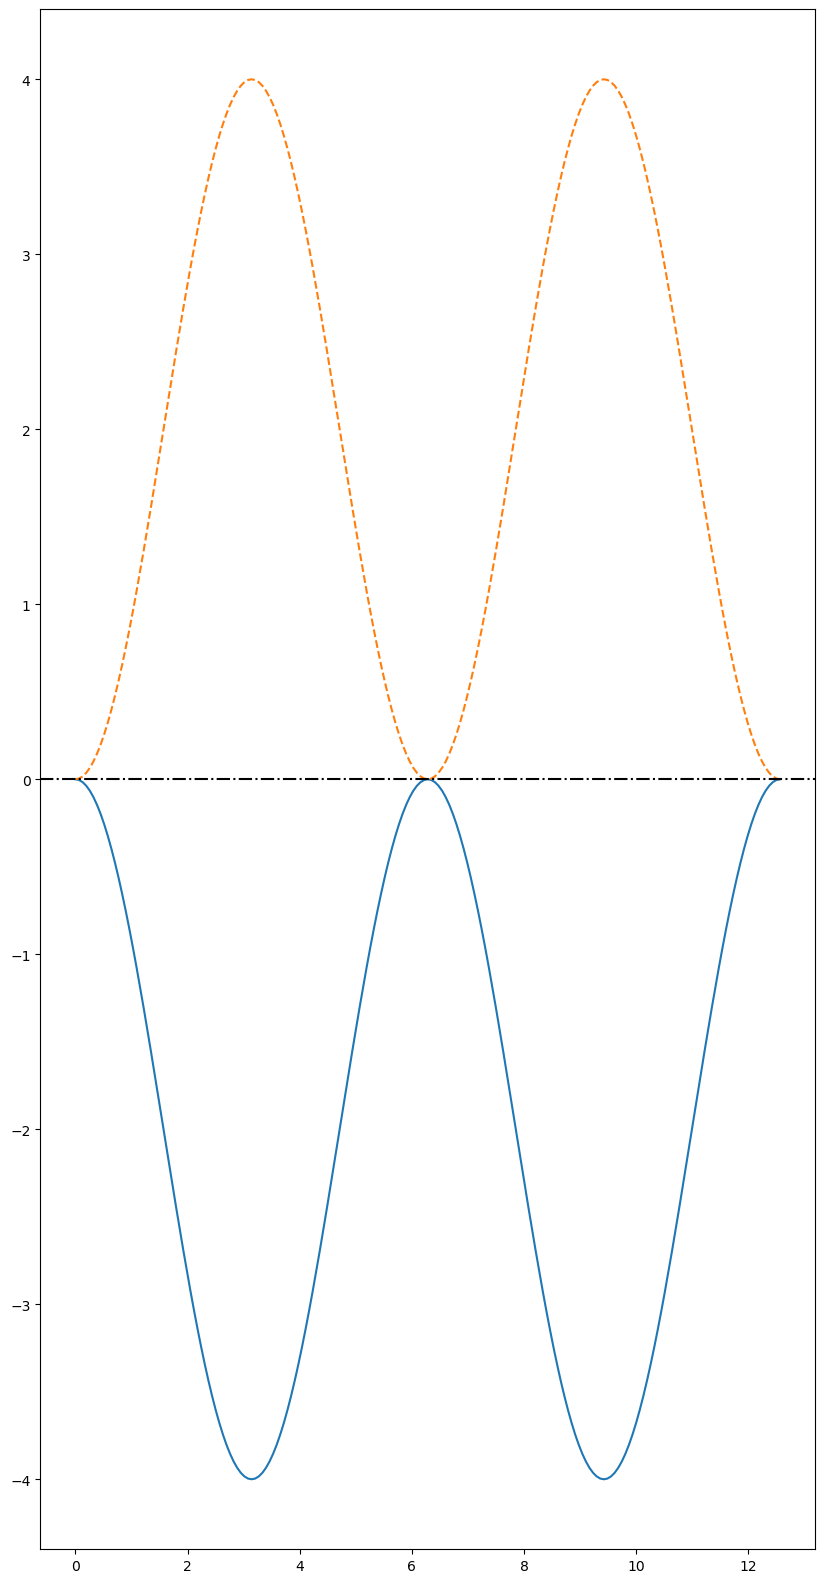

In [161]:
using HopTB
using PyPlot
lat = [1.0 0.0 0.0; 0.0 1.0 0.0; 0.0 0.0 1.0]
BN = TBModel(2, lat)
# 子晶格 A 的位置 (在晶格点 [0, 0, 0])
setposition!(BN, [0, 0, 0], 1, 1, 1, (BN.lat * [0, 0, 0])[1])
setposition!(BN, [0, 0, 0], 1, 1, 2, (BN.lat * [0, 0, 0])[2])
setposition!(BN, [0, 0, 0], 1, 1, 3, (BN.lat * [0, 0, 0])[3])

# 子晶格 B 的位置 (在晶格点 [a/2, a/2, 0])
setposition!(BN, [0, 0, 0], 2, 2, 1, (BN.lat * [1/2, 1/2, 0])[1])
setposition!(BN, [0, 0, 0], 2, 2, 2, (BN.lat * [1/2, 1/2, 0])[2])
setposition!(BN, [0, 0, 0], 2, 2, 3, (BN.lat * [1/2, 1/2, 0])[3])


# Parameters
t = 0.02
λ =0
J1 = 1.0
J2 = 1.0

# 1. -t(cos(kx) + cos(ky)) * σ0
# 作用在哈密顿量的对角线元素上
sethopping!(BN, [1, 0, 0], 1, 1, -t)  # kx方向上的跳跃 (σ0)
sethopping!(BN, [-1, 0, 0], 1, 1, -t) # 反向的kx跳跃 (σ0)
sethopping!(BN, [1, 0, 0], 2, 2, -t)  # kx方向上的跳跃 (σ0)
sethopping!(BN, [-1, 0, 0], 2, 2, -t) # 反向的kx跳跃 (σ0)
sethopping!(BN, [0, 1, 0], 2, 2, -t)  # ky方向上的跳跃 (σ0)
sethopping!(BN, [0, -1, 0], 2, 2, -t) # 反向的ky跳跃 (σ0)
sethopping!(BN, [0, 1, 0], 1, 1, -t)  # ky方向上的跳跃 (σ0)
sethopping!(BN, [0, -1, 0], 1, 1, -t) # 反向的ky跳跃 (σ0)


# 2. (λ/2) * [sin(kx + ky) * σx + sin(ky - kx) * σy]
# 作用在哈密顿量的非对角线元素上 (σx, σy)
sethopping!(BN, [1, 1, 0], 1, 2, λ/2)  # kx+ky方向上的跳跃 (σx)
sethopping!(BN, [-1, -1, 0], 1, 2, λ/2)  # 反向跳跃 (σx)
sethopping!(BN, [-1, -1, 0], 2, 1, λ/2) # 反向跳跃 (σx)
sethopping!(BN, [1, 1, 0], 2, 1, λ/2)  # kx+ky方向上的跳跃 (σx)

sethopping!(BN, [1, -1, 0], 1, 2, -im*λ/2) # kx-ky方向上的跳跃 (σy)
sethopping!(BN, [-1, 1, 0], 1, 2, -im*λ/2) # 反向跳跃 (σy)
sethopping!(BN, [1, -1, 0], 2, 1, im*λ/2) # kx-ky方向上的跳跃 (σy)
sethopping!(BN, [-1, 1, 0], 2, 1, im*λ/2) # 反向跳跃 (σy)

# 3. J1 * (cos(kx) - cos(ky)) + J2 * sin(kx) * sin(ky) * σz
# 作用在哈密顿量的对角线元素上 (σz)
sethopping!(BN, [1, 0, 0], 1, 1, J1)   # kx方向上的跳跃 (σz)
sethopping!(BN, [-1, 0, 0], 1, 1, J1)   # kx方向上的跳跃 (σz)
sethopping!(BN, [0, 1, 0], 1, 1, -J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [0, -1, 0], 1, 1, -J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [1, 1, 0], 1, 1, J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, -1, 0], 1, 1, J2)  # 反向跳跃 (σz)
sethopping!(BN, [1, -1, 0], 1, 1, -J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, 1, 0], 1, 1, -J2)  # 反向跳跃 (σz)
sethopping!(BN, [1, 0, 0], 2, 2, -J1)  # kx方向上的跳跃 (σz)
sethopping!(BN, [-1, 0, 0], 2, 2, -J1)   # kx方向上的跳跃 (σz)
sethopping!(BN, [0, 1, 0], 2, 2, J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [0, -1, 0], 2, 2, J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [1, 1, 0], 2, 2, -J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, -1, 0], 2, 2, -J2)  # 反向跳跃 (σz)
sethopping!(BN, [1, -1, 0], 2, 2, J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, 1, 0], 2, 2, J2)  # 反向跳跃 (σz)



kpath = zeros(Float64, 3, 5)
kpath[:, 1] = [0.5, 0.5, 0.0]  # M
kpath[:, 2] = [0.0, 0.5, 0.0]  # X
kpath[:, 3] = [0.0, 0.0, 0.0]  # Γ
kpath[:, 4] = [0.5, 0.0, 0.0]  # Y
kpath[:, 5] = [0.5, 0.5, 0.0]  # Γ
kdist, egvals = HopTB.BandStructure.getbs(BN, kpath, 50, connect_end_points=true)

fig = figure("Band structure monolayer hBN",figsize=(10,20))

max_val=findmax(egvals[1,:])[1]
egvals=egvals.-max_val

plot(kdist,egvals[1,:],linestyle="-")
plot(kdist,egvals[2,:],linestyle="--")
PyPlot.axhline(0.0,color="black",linestyle="-.")
PyPlot.show()

In [77]:
using HopTB,Test
using PyPlot
lat = [1 0 0; 0 1 0; 0 0 1]
site_positions = lat*([1/2 0 0; 0 1/2 0]');
# TBmodel the second vector is orbital type (s in this case one for site)
BN = TBModel(lat,site_positions,[[0], [0]])


# Parameters
t = 0.02
λ =0.4 
J1 = 1.0
J2 = 1.0

# 1. -t(cos(kx) + cos(ky)) * σ0
# 作用在哈密顿量的对角线元素上
sethopping!(BN, [1, 0, 0], 1, 1, -t)  # kx方向上的跳跃 (σ0)
sethopping!(BN, [-1, 0, 0], 1, 1, -t) # 反向的kx跳跃 (σ0)
sethopping!(BN, [1, 0, 0], 2, 2, -t)  # kx方向上的跳跃 (σ0)
sethopping!(BN, [-1, 0, 0], 2, 2, -t) # 反向的kx跳跃 (σ0)
sethopping!(BN, [0, 1, 0], 2, 2, -t)  # ky方向上的跳跃 (σ0)
sethopping!(BN, [0, -1, 0], 2, 2, -t) # 反向的ky跳跃 (σ0)
sethopping!(BN, [0, 1, 0], 1, 1, -t)  # ky方向上的跳跃 (σ0)
sethopping!(BN, [0, -1, 0], 1, 1, -t) # 反向的ky跳跃 (σ0)


# 2. (λ/2) * [sin(kx + ky) * σx + sin(ky - kx) * σy]
# 作用在哈密顿量的非对角线元素上 (σx, σy)
sethopping!(BN, [1, 1, 0], 1, 2, λ/2)  # kx+ky方向上的跳跃 (σx)
sethopping!(BN, [-1, -1, 0], 1, 2, λ/2)  # 反向跳跃 (σx)
sethopping!(BN, [-1, -1, 0], 2, 1, λ/2) # 反向跳跃 (σx)
sethopping!(BN, [1, 1, 0], 2, 1, λ/2)  # kx+ky方向上的跳跃 (σx)

sethopping!(BN, [1, -1, 0], 1, 2, -im*λ/2) # kx-ky方向上的跳跃 (σy)
sethopping!(BN, [-1, 1, 0], 1, 2, -im*λ/2) # 反向跳跃 (σy)
sethopping!(BN, [1, -1, 0], 2, 1, im*λ/2) # kx-ky方向上的跳跃 (σy)
sethopping!(BN, [-1, 1, 0], 2, 1, im*λ/2) # 反向跳跃 (σy)

# 3. J1 * (cos(kx) - cos(ky)) + J2 * sin(kx) * sin(ky) * σz
# 作用在哈密顿量的对角线元素上 (σz)
sethopping!(BN, [1, 0, 0], 1, 1, J1)   # kx方向上的跳跃 (σz)
sethopping!(BN, [-1, 0, 0], 1, 1, J1)   # kx方向上的跳跃 (σz)
sethopping!(BN, [0, 1, 0], 1, 1, -J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [0, -1, 0], 1, 1, -J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [1, 1, 0], 1, 1, J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, -1, 0], 1, 1, J2)  # 反向跳跃 (σz)
sethopping!(BN, [1, -1, 0], 1, 1, J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, 1, 0], 1, 1, J2)  # 反向跳跃 (σz)
sethopping!(BN, [1, 0, 0], 2, 2, J1)   # kx方向上的跳跃 (σz)
sethopping!(BN, [-1, 0, 0], 2, 2, J1)   # kx方向上的跳跃 (σz)
sethopping!(BN, [0, 1, 0], 2, 2, -J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [0, -1, 0], 2, 2, -J1)  # ky方向上的跳跃 (σz)
sethopping!(BN, [1, 1, 0], 2, 2, J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, -1, 0], 2, 2, J2)  # 反向跳跃 (σz)
sethopping!(BN, [1, -1, 0], 2, 2, J2)    # kx+ky方向的跳跃 (σz)
sethopping!(BN, [-1, 1, 0], 2, 2, J2)  # 反向跳跃 (σz)



kpath=zeros(Float64,3,4)
kpath[:,1]=[0.0, 0.0, 0.0] # Γ
kpath[:,2]=[0.0, 0.5, 0.0] # M
kpath[:,3]=[0.5, 0.5, 0.0] # K
kpath[:,4]=[0.0 , 0.0, 0.0] # Γ

kdist, egvals = HopTB.BandStructure.getbs(BN, kpath, 50, connect_end_points=true)

fig = figure(“Band structure monolayer hBN”,figsize=(10,20))

max_val=findmax(egvals[1,:])[1]
egvals=egvals.-max_val

plot(kdist,egvals[1,:])
plot(kdist,egvals[2,:])
PyPlot.axhline(0.0,color=”black”,linestyle=”–“)
PyPlot.show()

LoadError: MethodError: no method matching TBModel(::Matrix{Int64}, ::Matrix{Float64}, ::Vector{Vector{Int64}})

[0mClosest candidates are:
[0m  TBModel([91m::AbstractMatrix{Float64}[39m, ::Matrix{Float64}, ::Vector{Vector{Int64}}; isspinful, isorthogonal, is_canonical_ordered)
[0m[90m   @[39m [36mHopTB[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mmodel.jl:316[24m[39m
[0m  TBModel([91m::Int64[39m, ::AbstractMatrix{Float64}; isorthogonal)
[0m[90m   @[39m [36mHopTB[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mmodel.jl:308[24m[39m
[0m  TBModel([91m::AbstractMatrix{Float64}[39m, ::Matrix{Float64}; isorthogonal)
[0m[90m   @[39m [36mHopTB[39m [90mC:\Users\woxin\Documents\GitHub\HopTB.jl\src\[39m[90m[4mmodel.jl:312[24m[39m


sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


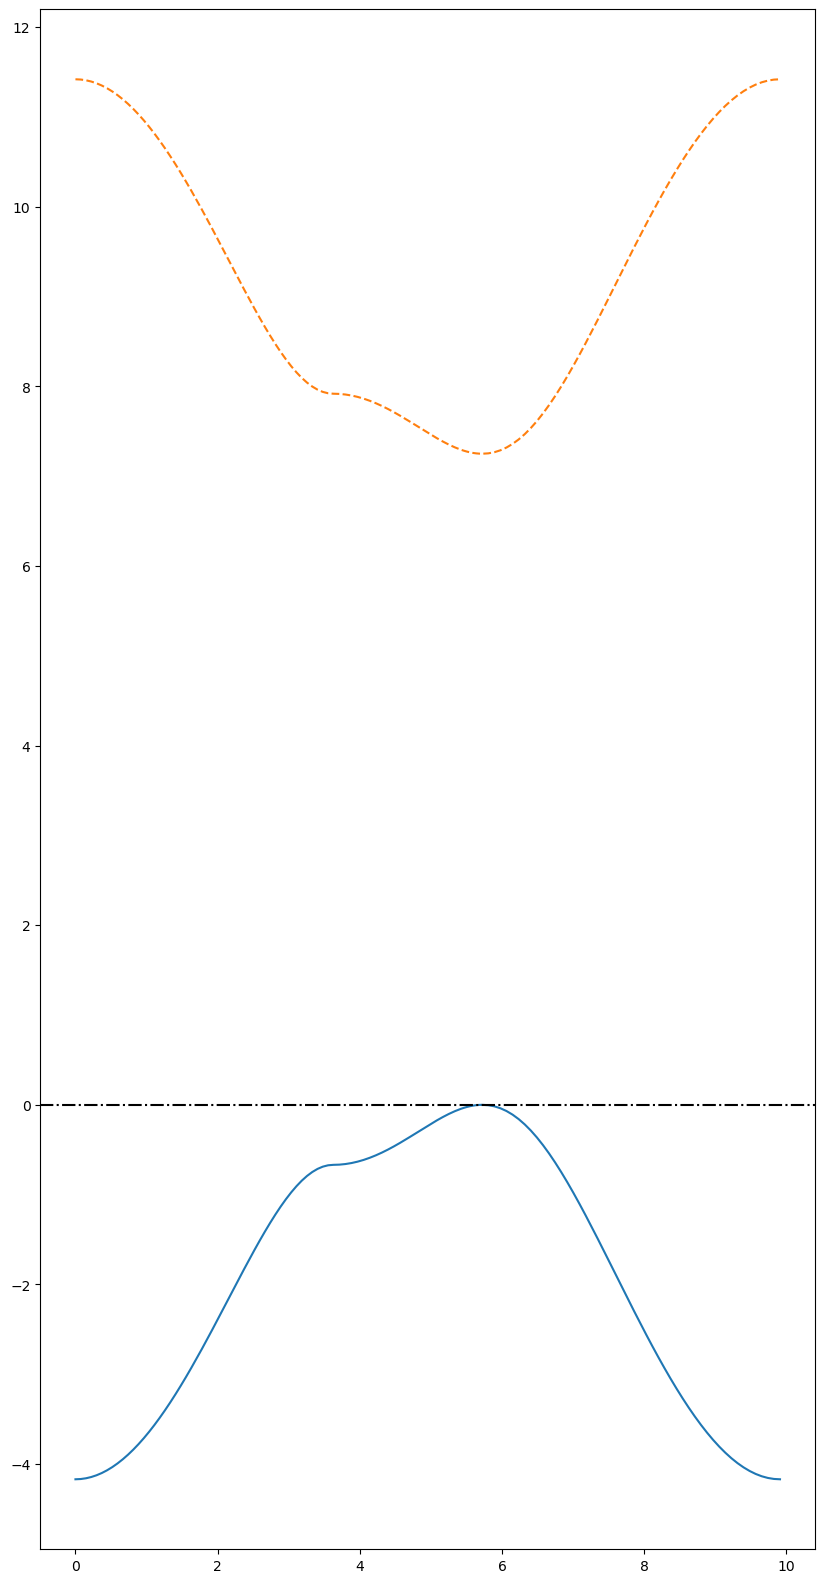

In [111]:
using HopTB
using PyPlot

lat = [1 1/2 0; 0 √3/2 0; 0 0 1]
site_positions = lat*([1/3 1/3 0; 2/3 2/3 0]');
# TBmodel the second vector is orbital type (s in this case one for site)
tm = TBModel(lat,site_positions,[[0], [0]])

# Parameters from Phys. Rev. B 94, 125303
t_0 =2.30 # eV
E_gap=3.625*2.0 # eV

addhopping!(tm, [0, 0, 0], (1, 1), (1, 1), -E_gap/2.0)
addhopping!(tm, [0, 0, 0], (2, 1), (2, 1), E_gap/2.0)

addhopping!(tm, [0, 0, 0], (1, 1), (2, 1), t_0)
addhopping!(tm, [-1, 0, 0], (1, 1), (2, 1), t_0)
addhopping!(tm, [0, -1, 0], (1, 1), (2, 1), t_0)

kpath=zeros(Float64,3,4)
kpath[:,1]=[0.0, 0.0, 0.0] # Γ
kpath[:,2]=[0.0, 0.5, 0.0] # M
kpath[:,3]=[1.0/3.0, 2.0/3.0, 0.0] # K
kpath[:,4]=[0.0 , 0.0, 0.0] # Γ

kdist, egvals = HopTB.BandStructure.getbs(tm, kpath, 50, connect_end_points=true)

fig = figure("Band structure monolayer hBN",figsize=(10,20))

max_val=findmax(egvals[1,:])[1]
egvals=egvals.-max_val

plot(kdist,egvals[1,:], linestyle="-")  # Provide a valid linestyle argument
plot(kdist,egvals[2,:], linestyle="--")  # Provide a valid linestyle argument
PyPlot.axhline(0.0, color="black", linestyle="-.")
PyPlot.show()